In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import imblearn

In [480]:
df = pd.read_csv("Crop_recommendation.csv")

In [481]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [482]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [483]:
df.shape

(2200, 8)

In [484]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [486]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [487]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [488]:
df.duplicated().sum() # no duplicate rows

np.int64(0)

In [489]:
df["label"].unique() # cateories or classes

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [490]:
df["label"].nunique() # number of categories or classes

22

In [491]:
df["label"].value_counts() # feature vectors in each category or class

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

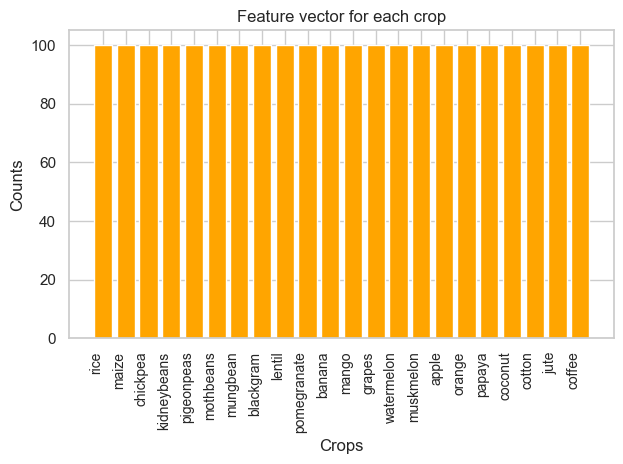

In [492]:
plt.bar(df["label"].unique(),df["label"].value_counts(),color = "orange")
plt.xlabel("Crops")
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate labels, align right, adjust font size
plt.ylabel("Counts")
plt.title("Feature vector for each crop")
plt.tight_layout()
plt.show()

In [493]:
series = df.isnull().sum()
# print(series) 
# print(series["ph"]) 

# List Comprehension
list = [series[var] for var in df.columns]
# print(list)

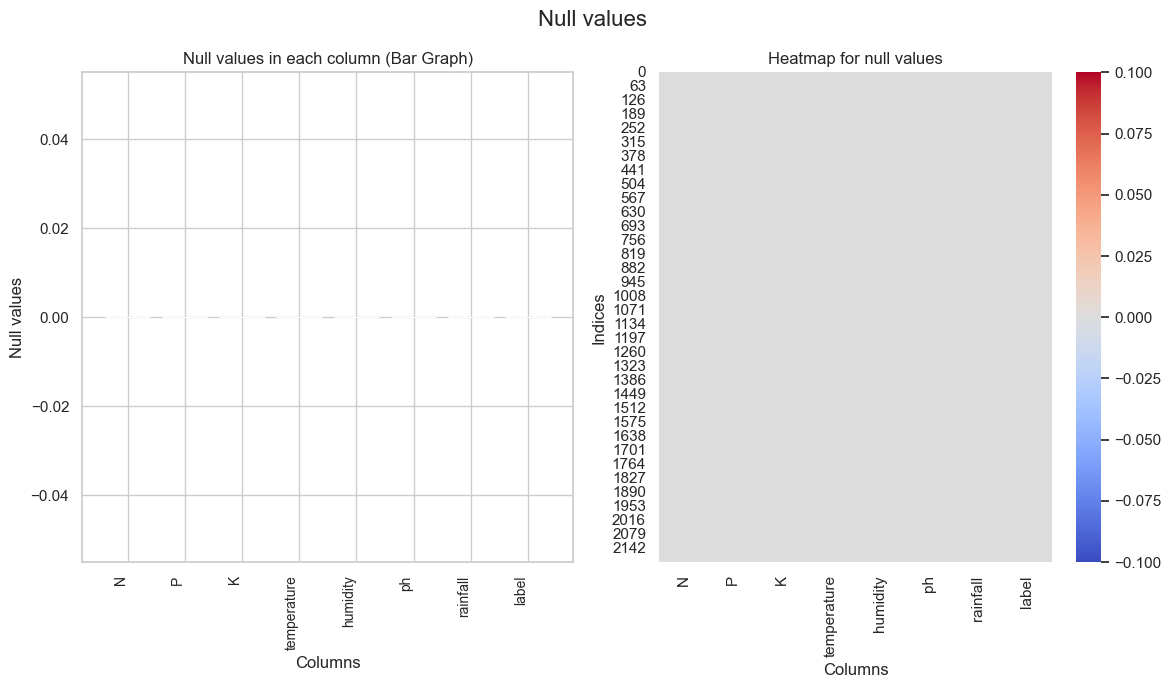

In [494]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1) # 1 row, 2 columns and in first subplot
plt.bar(df.columns, list)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate labels, align right, adjust font size
plt.xlabel("Columns")
plt.ylabel("Null values")
plt.title("Null values in each column (Bar Graph)")

plt.subplot(1,2,2)
sns.heatmap(df.isnull(), cmap = "coolwarm")
plt.title("Heatmap for null values")
plt.xlabel("Columns")
plt.ylabel("Indices")

plt.suptitle("Null values", fontsize=16)

plt.tight_layout()
plt.savefig("null_values.png",dpi = 300,bbox_inches = "tight")
plt.show()


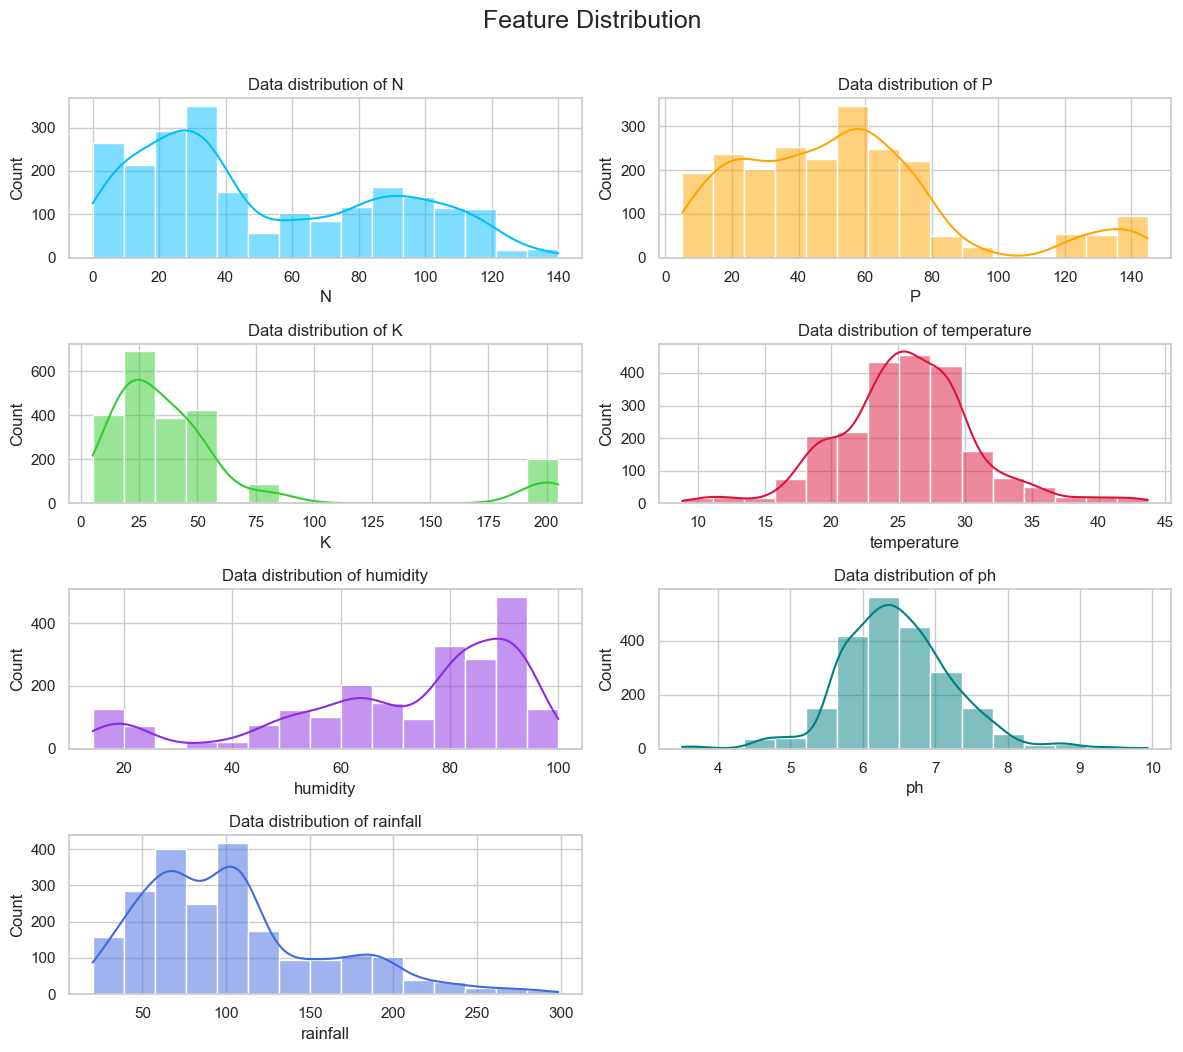

In [495]:
# Checking the distribution of each Feature
color_list = [
    "#00BFFF",  # N - Sky Blue
    "#FFA500",  # P - Orange
    "#32CD32",  # K - Lime Green
    "#DC143C",  # temperature - Crimson Red
    "#8A2BE2",  # humidity - Deep Purple
    "#008080",  # ph - Teal
    "#4169E1"   # rainfall - Royal Blue
]
fig, axes = plt.subplots(4,2,figsize = (12,10))
for index, var in enumerate(df.columns):
    if index == 7:
        axes[3,1].set_visible(False)# it hides the unused subplot.
    else:
        row = index // 2 #  Integer Division (Floor Division). It divides and gives only the whole number part (no decimal).
        column = index % 2 #modulus gives remainder
        sns.histplot(df[var],color = color_list[index], bins = 15, kde=True, ax = axes[row,column])
        axes[row,column].set_title(f"Data distribution of {var}")
        plt.tight_layout()
plt.tight_layout()
plt.suptitle("Feature Distribution",fontsize = 18, y= 1.05)
plt.savefig("data_distribution_of _features.png",dpi = 300,bbox_inches = "tight")
  

        

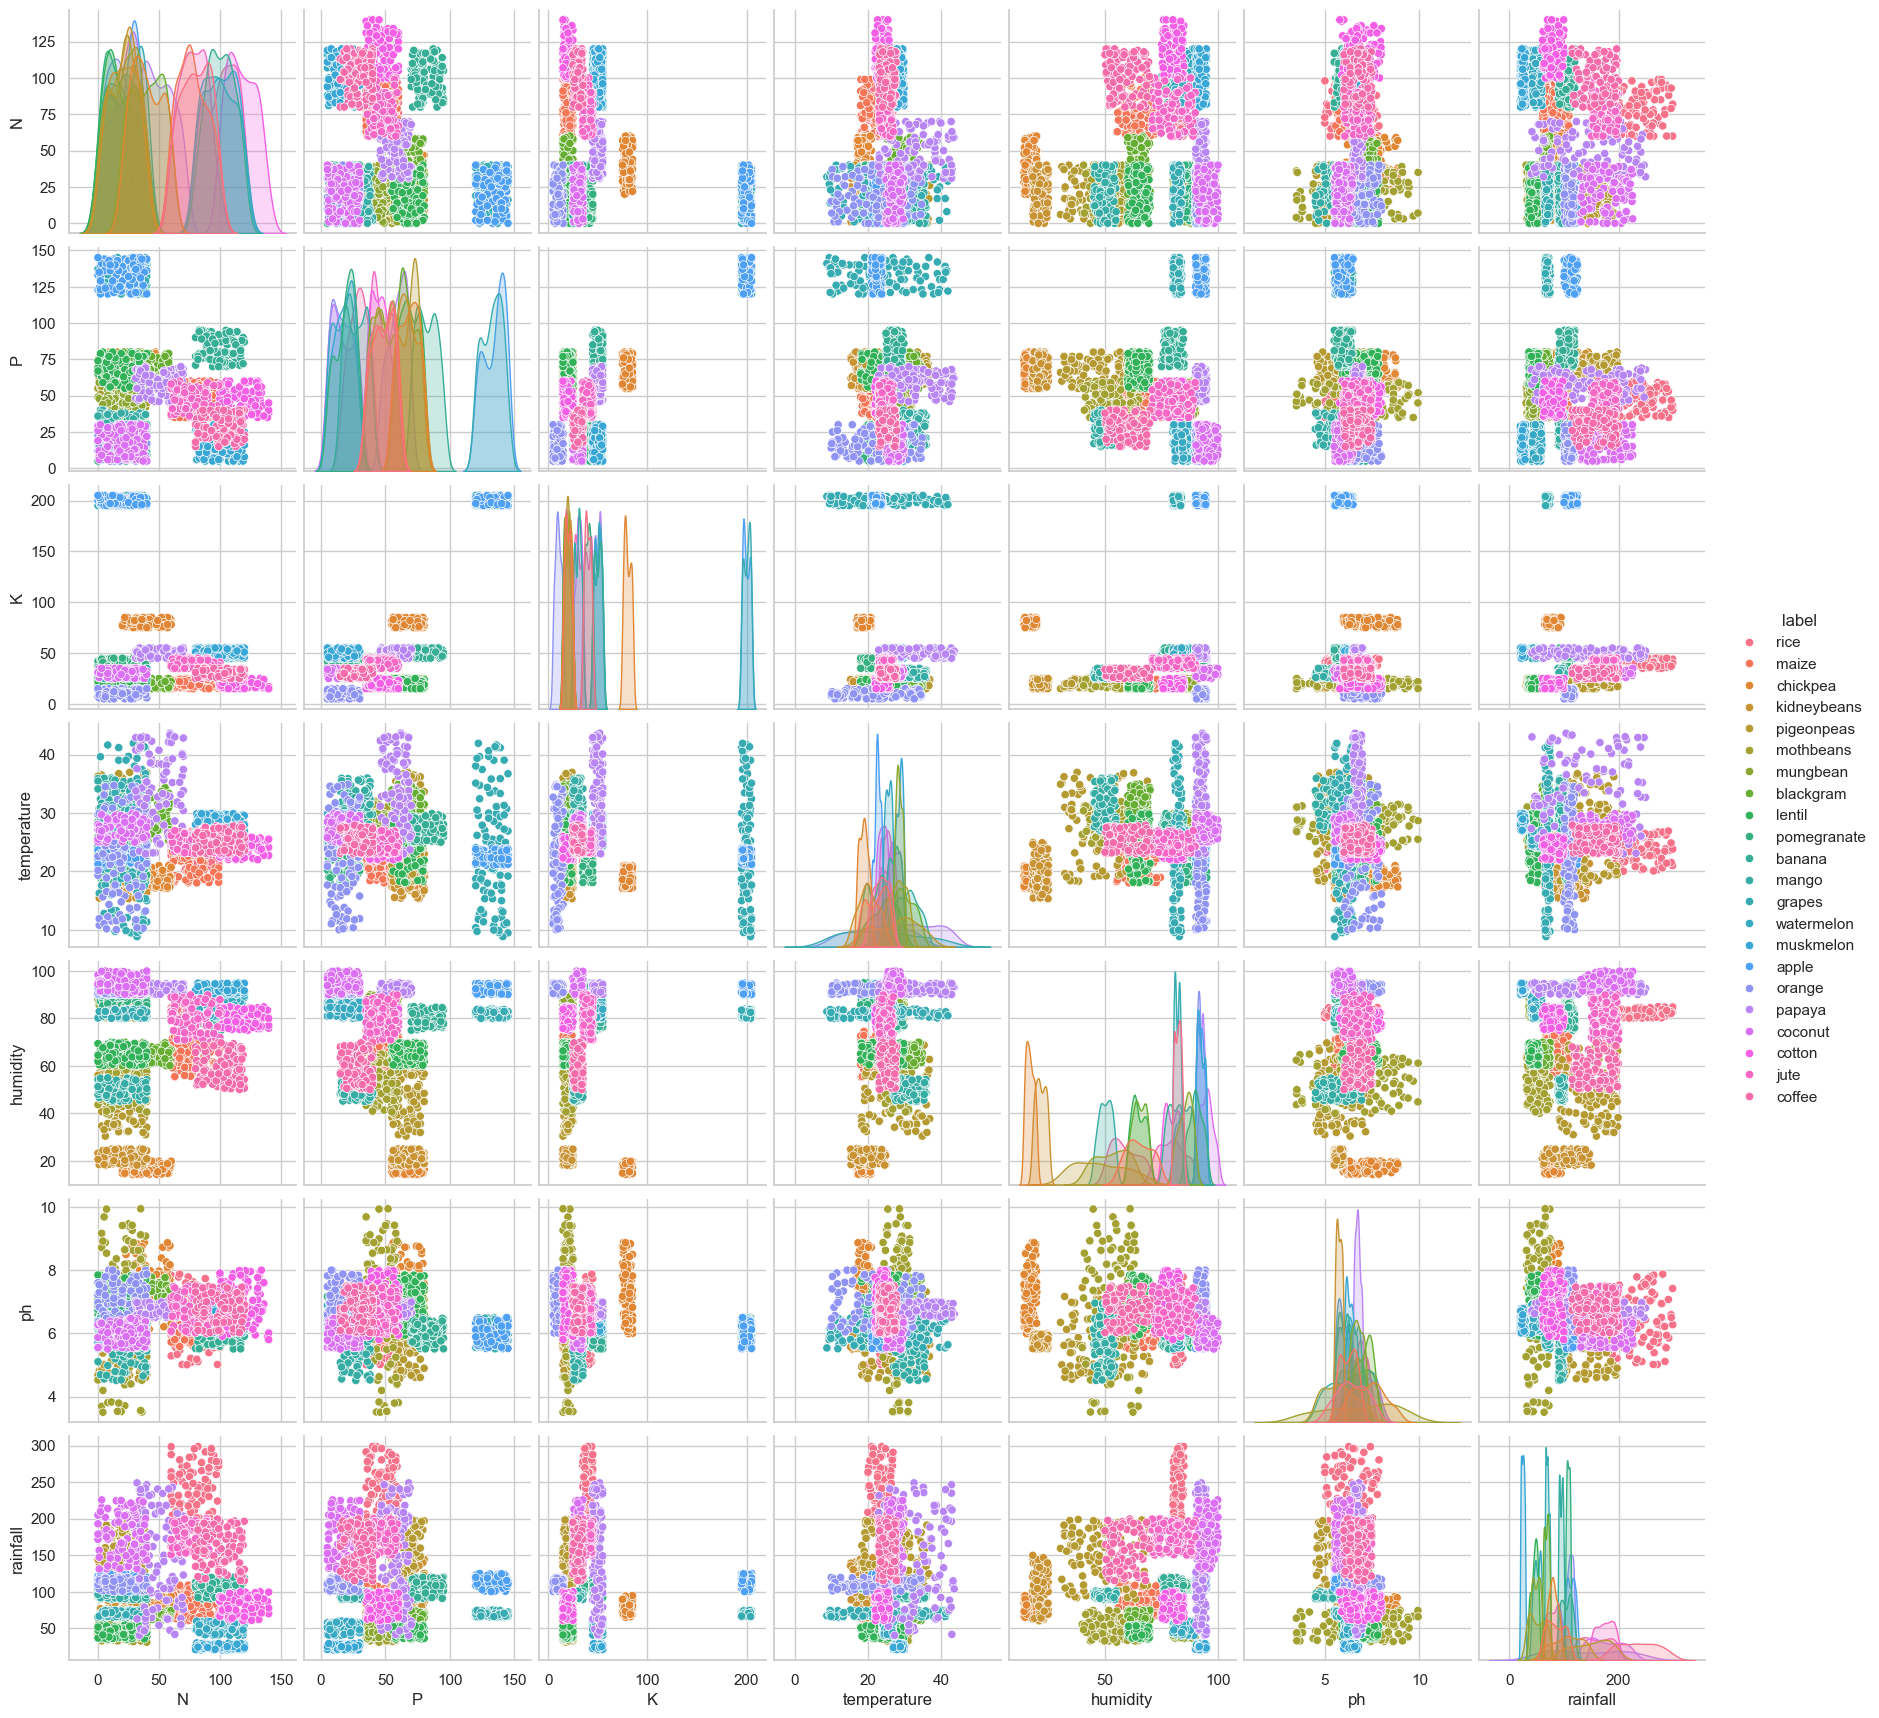

In [496]:
# Pairplot
# Diagonal : Distribution of individual features(histogram)
# Off-diagonal : Relationships (scatter plots) between pairs
# The upper triangle (above the diagonal) and the lower triangle (below the diagonal) 
# show scatter plots of the same feature pairs — just mirrored.
sns.pairplot(df, hue="label")
plt.savefig("pairplot.png",dpi = 300,bbox_inches = "tight")

In [497]:
# Checking the scatter plot whether it is similar to above or not
# plt.figure(figsize=(12,12))
# sns.scatterplot(data = df, x= "K",y = "temperature",hue="label")
# plt.tight_layout()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05))

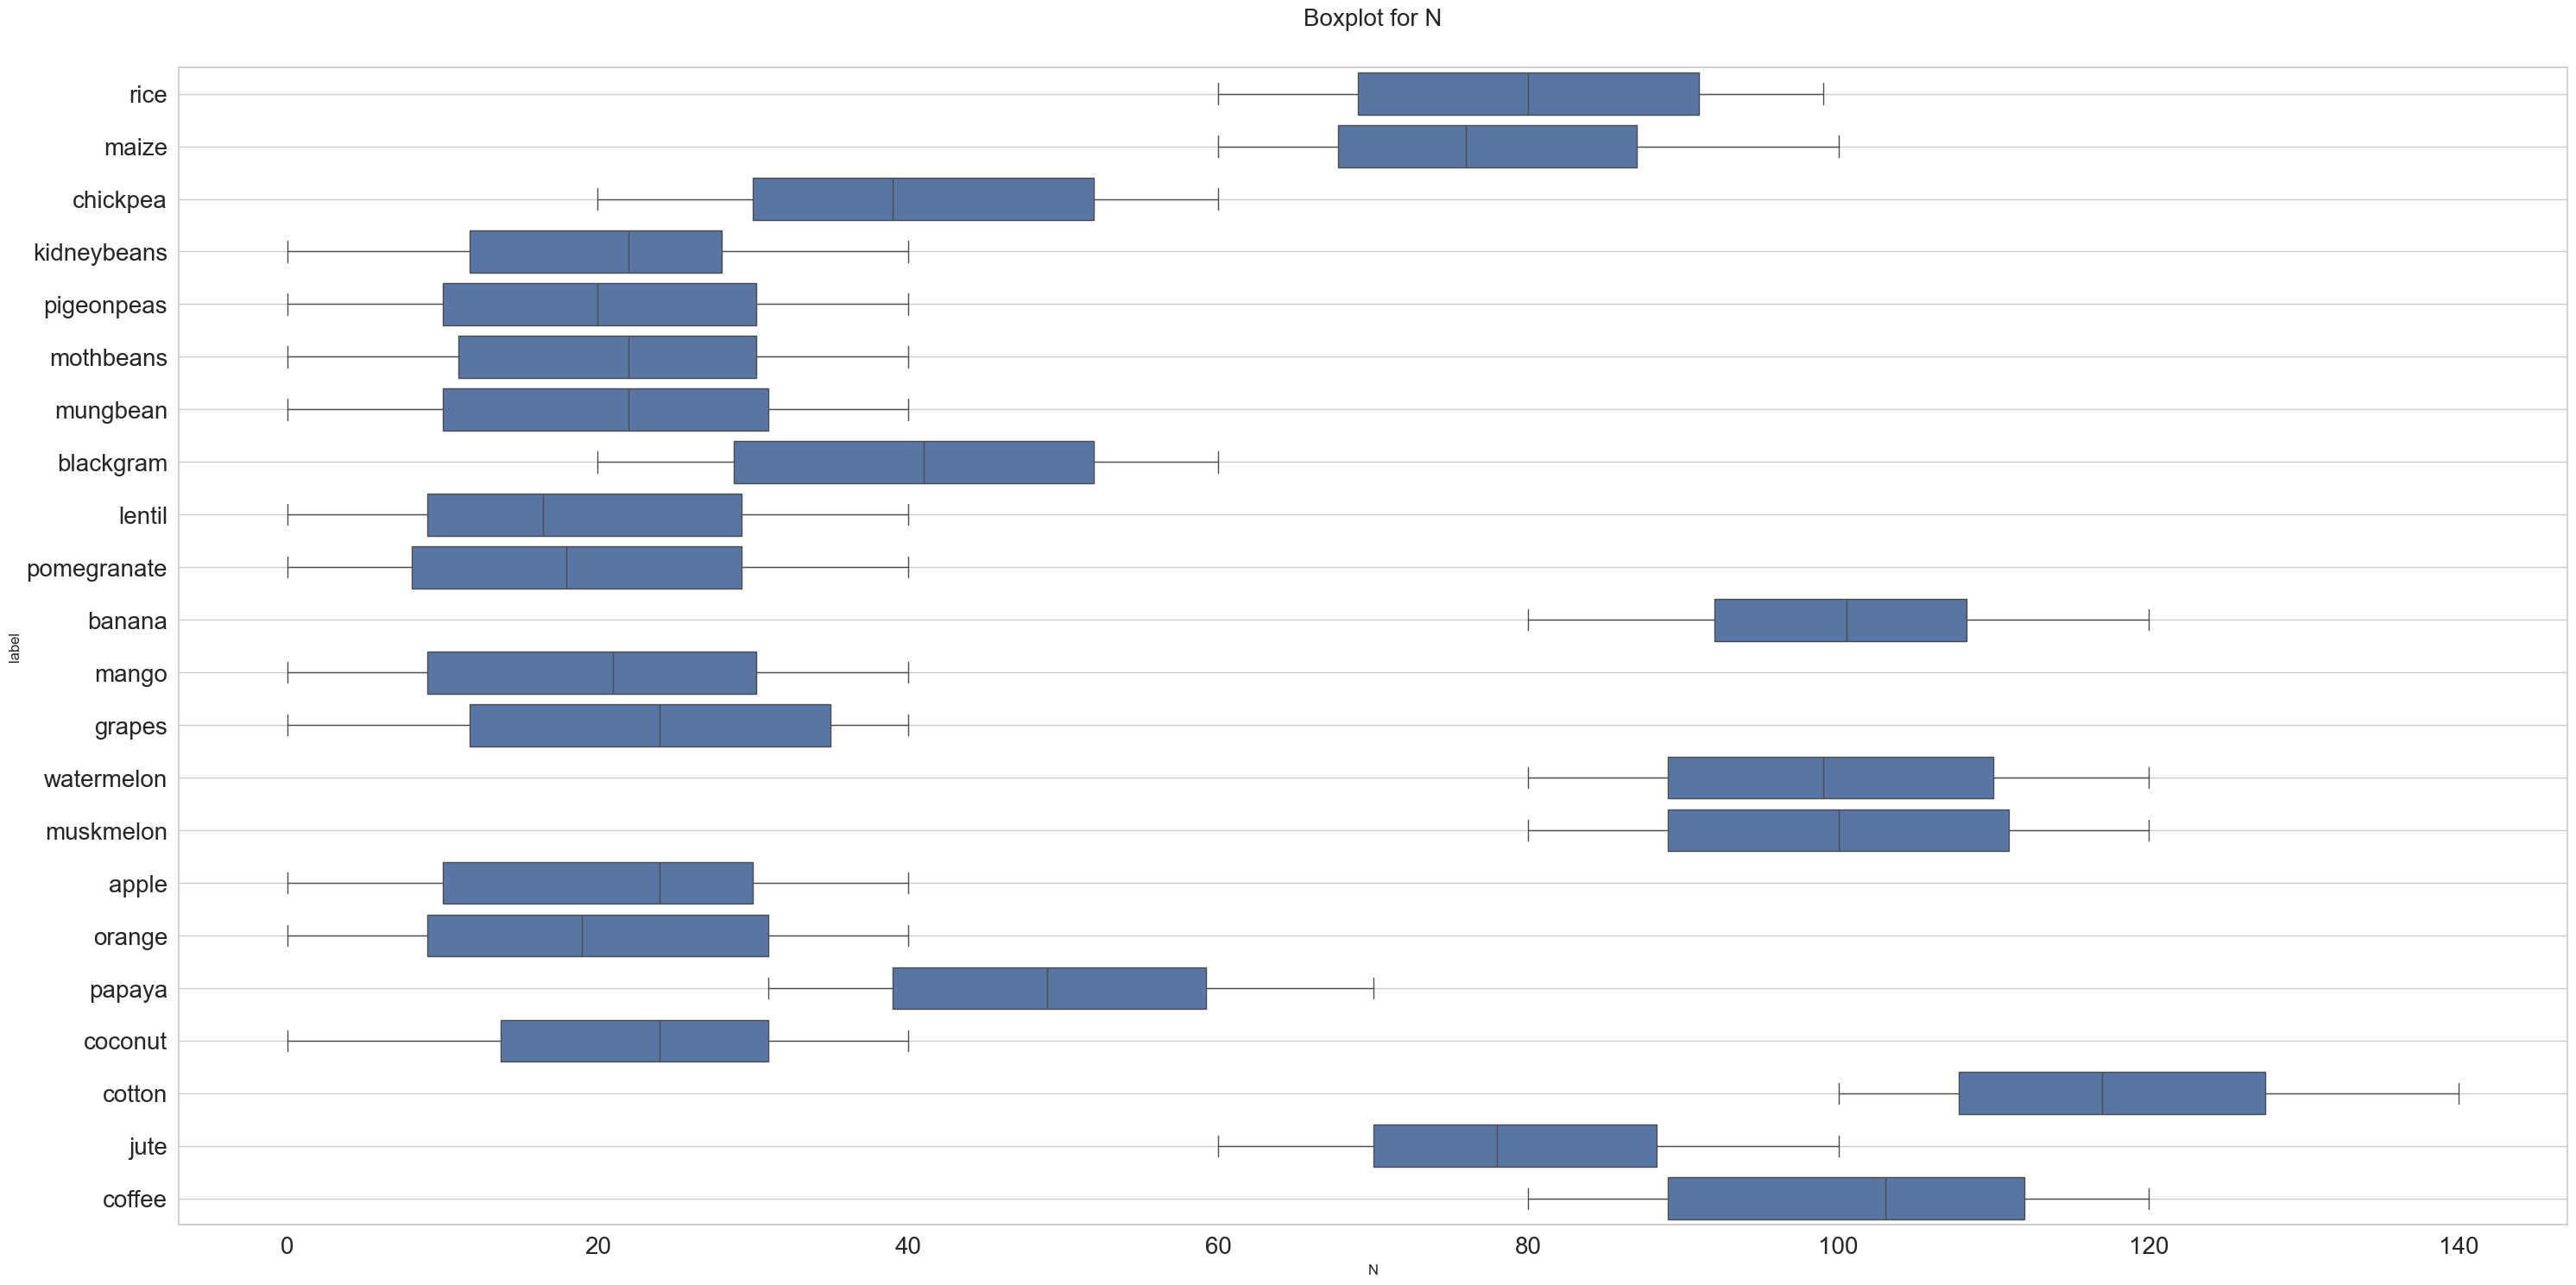

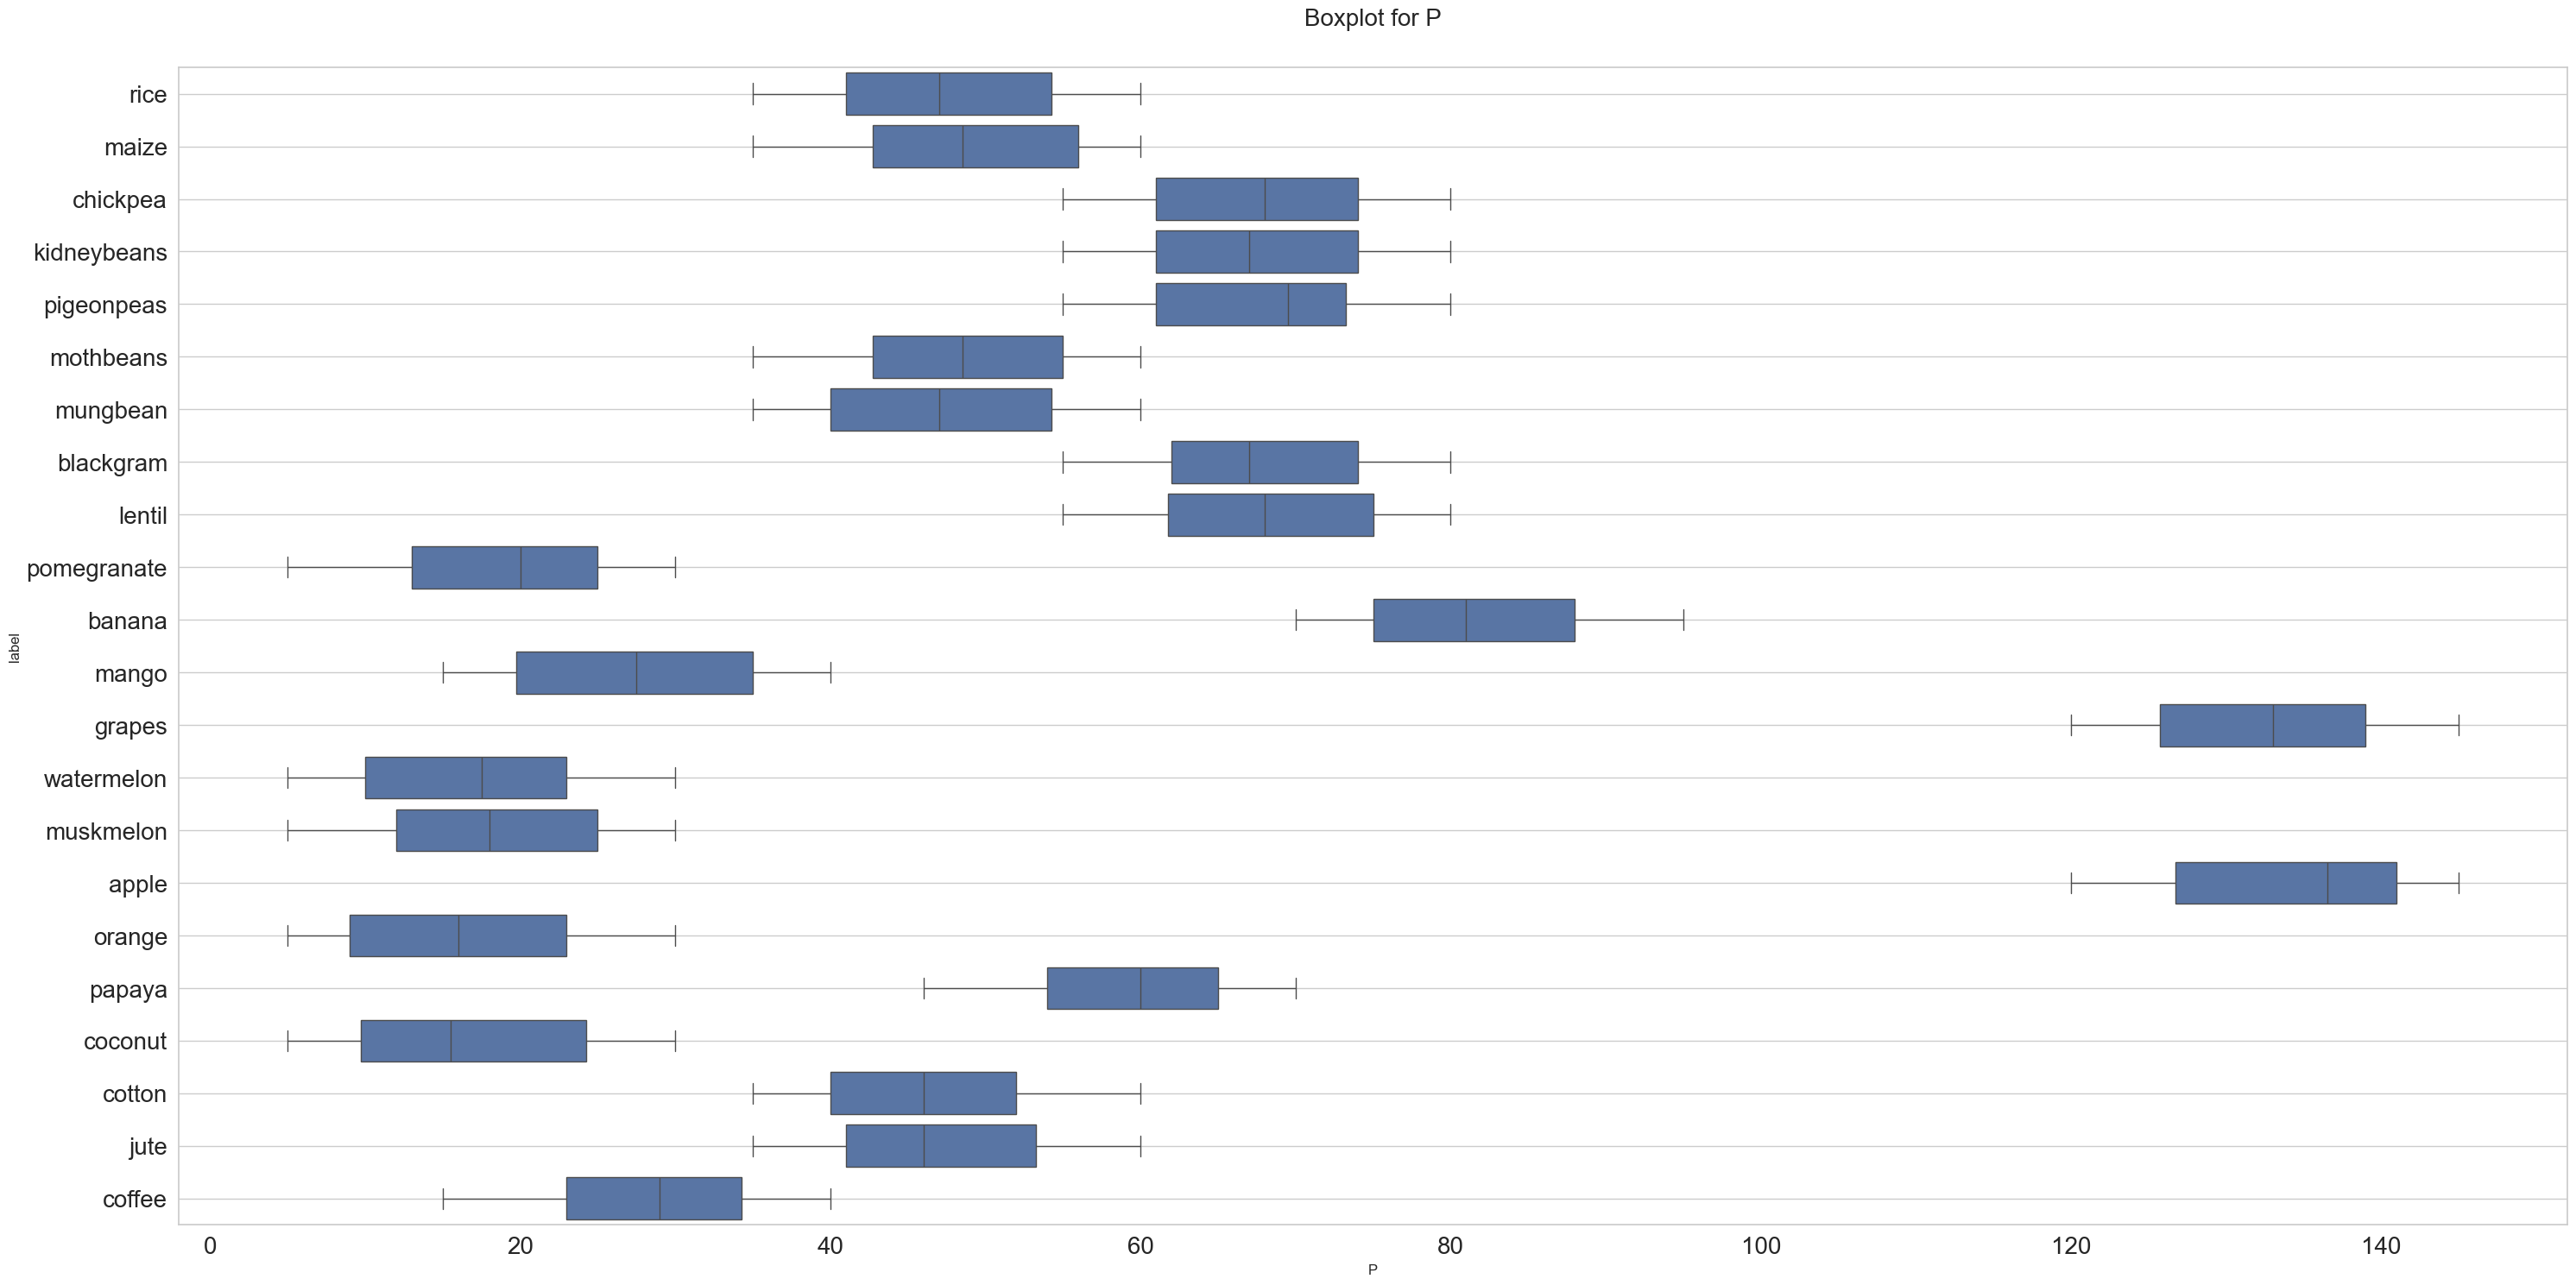

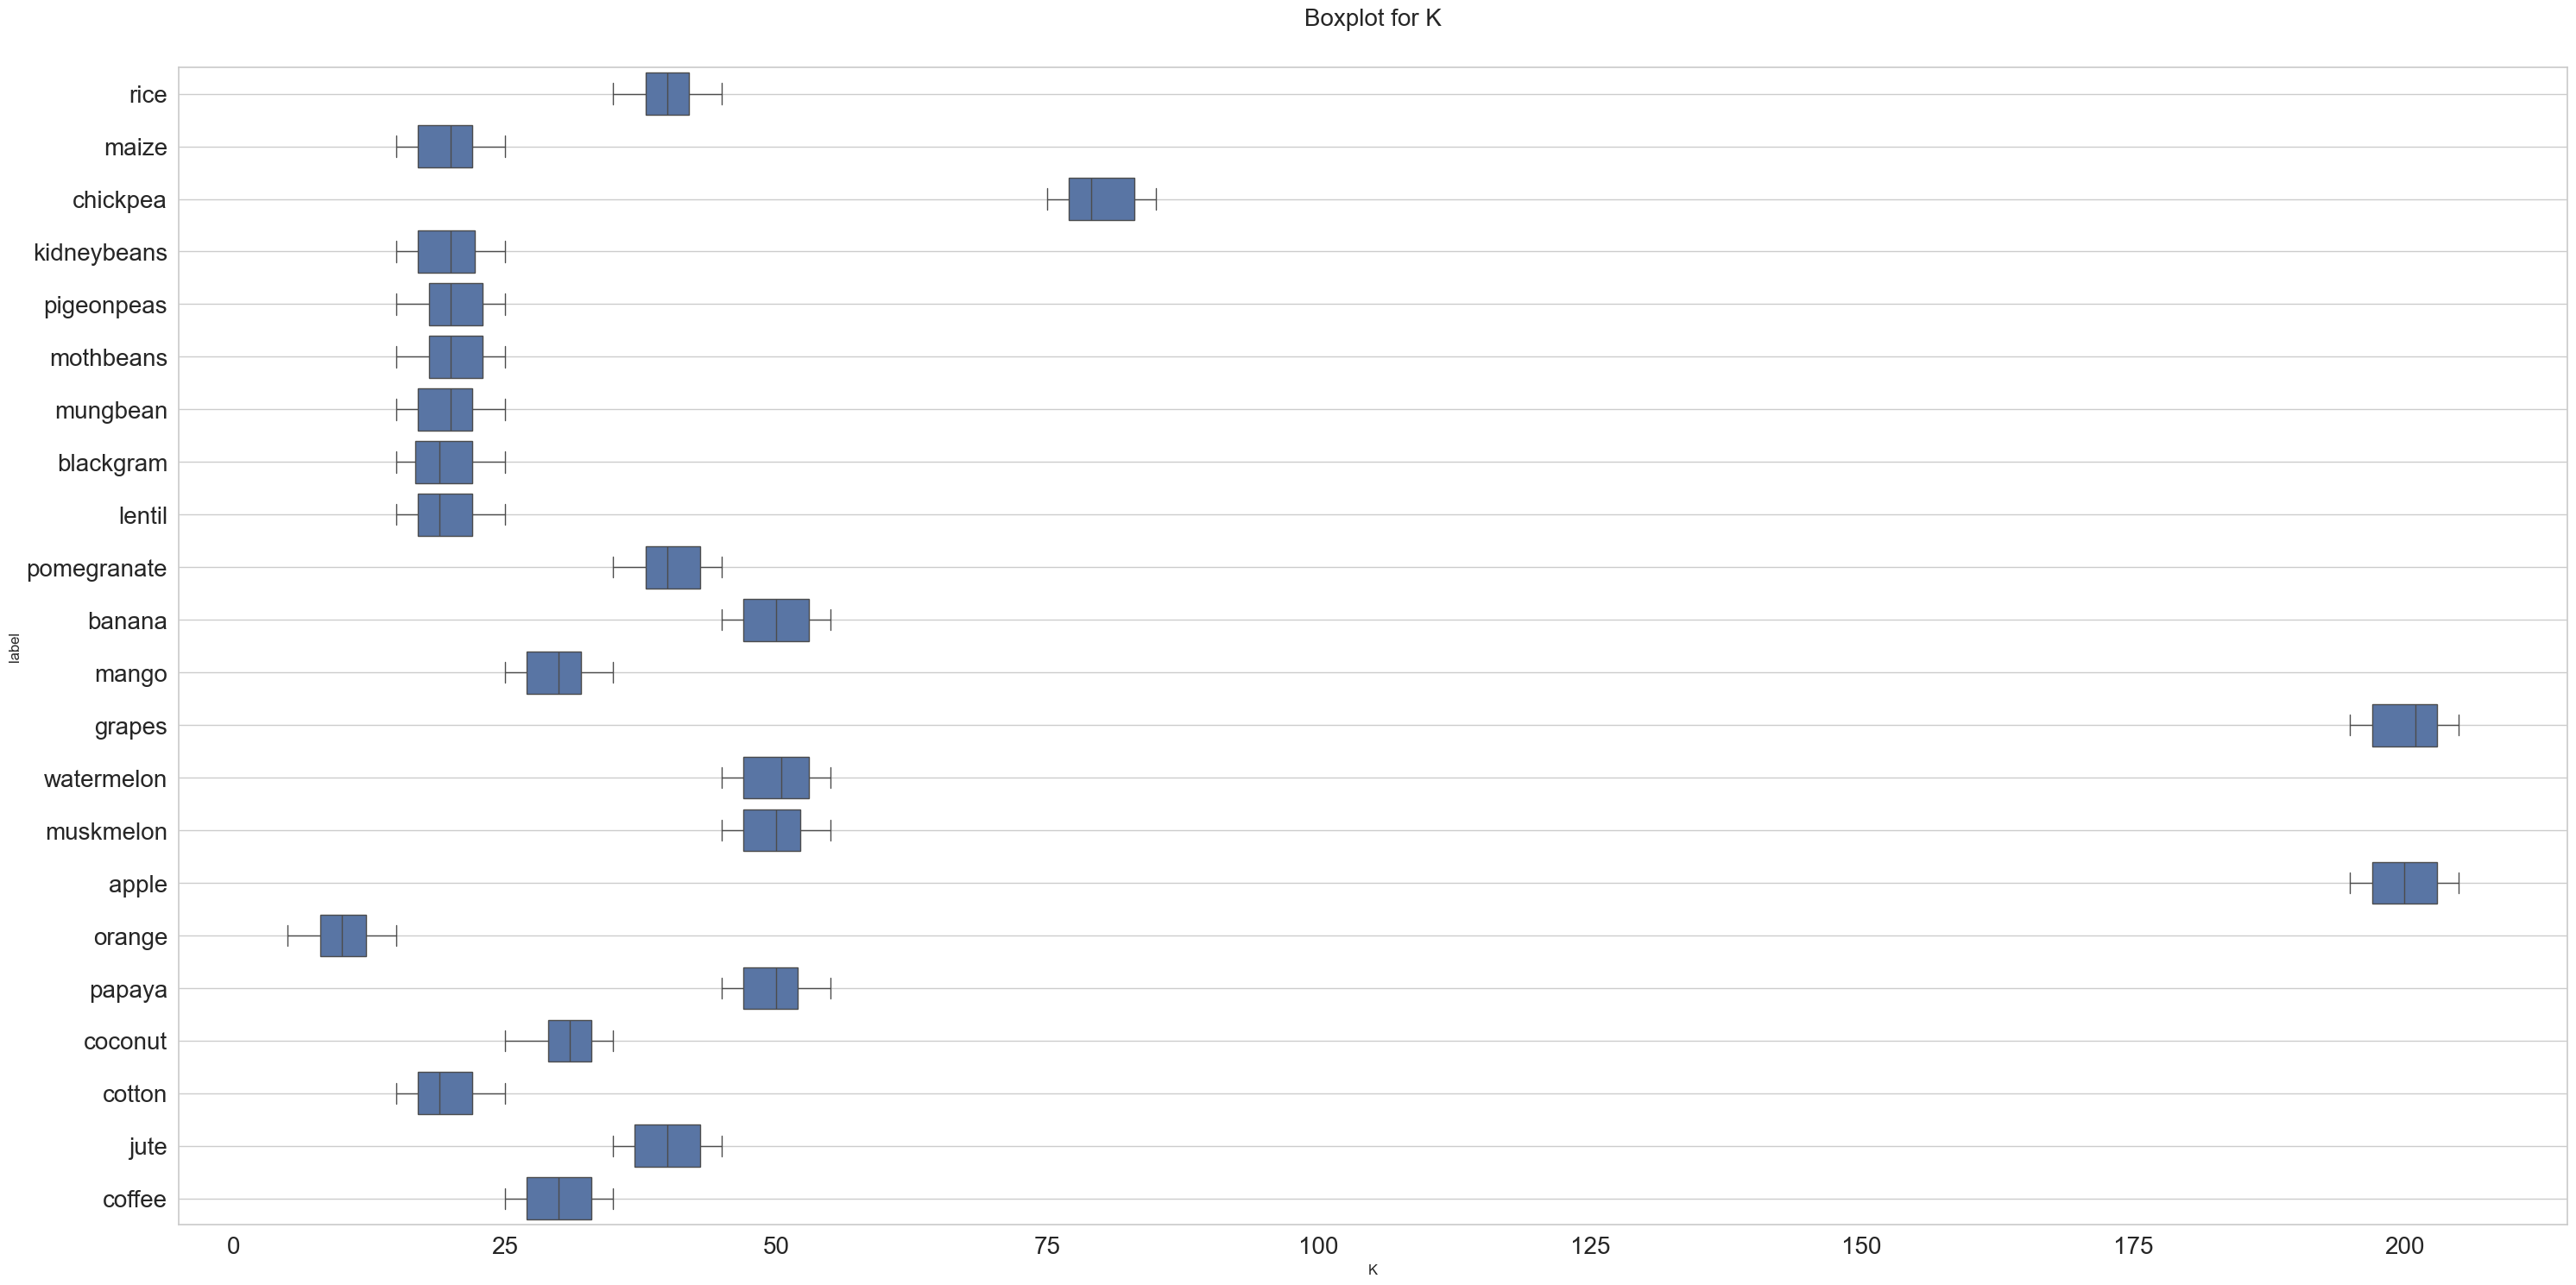

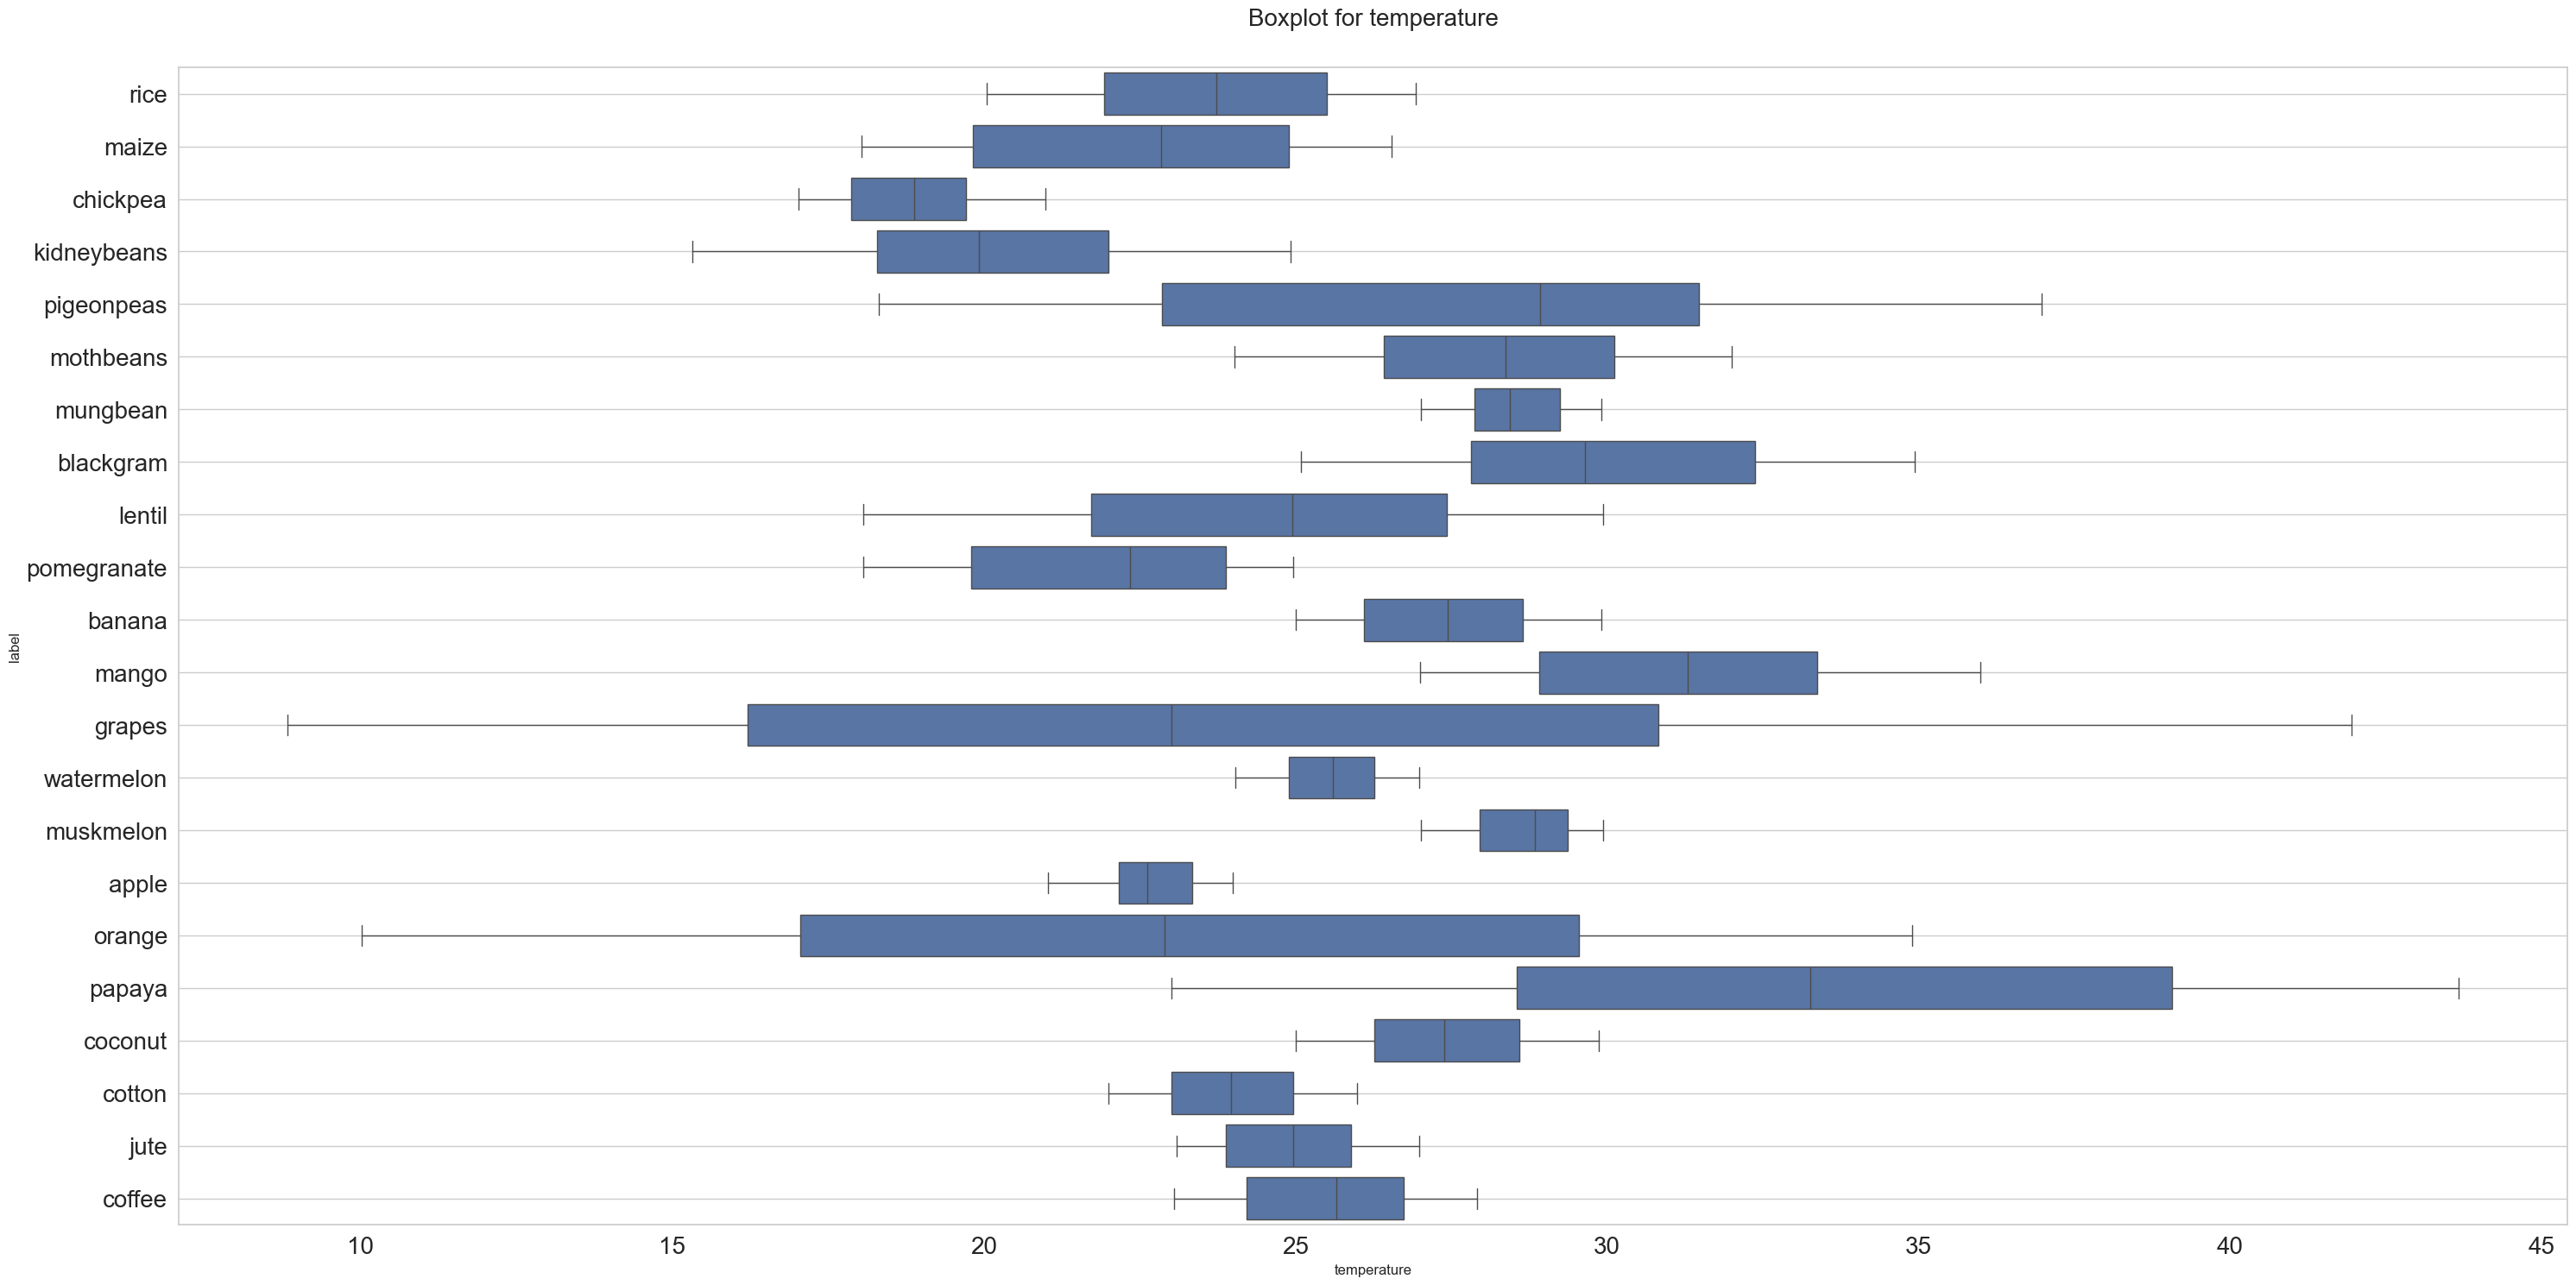

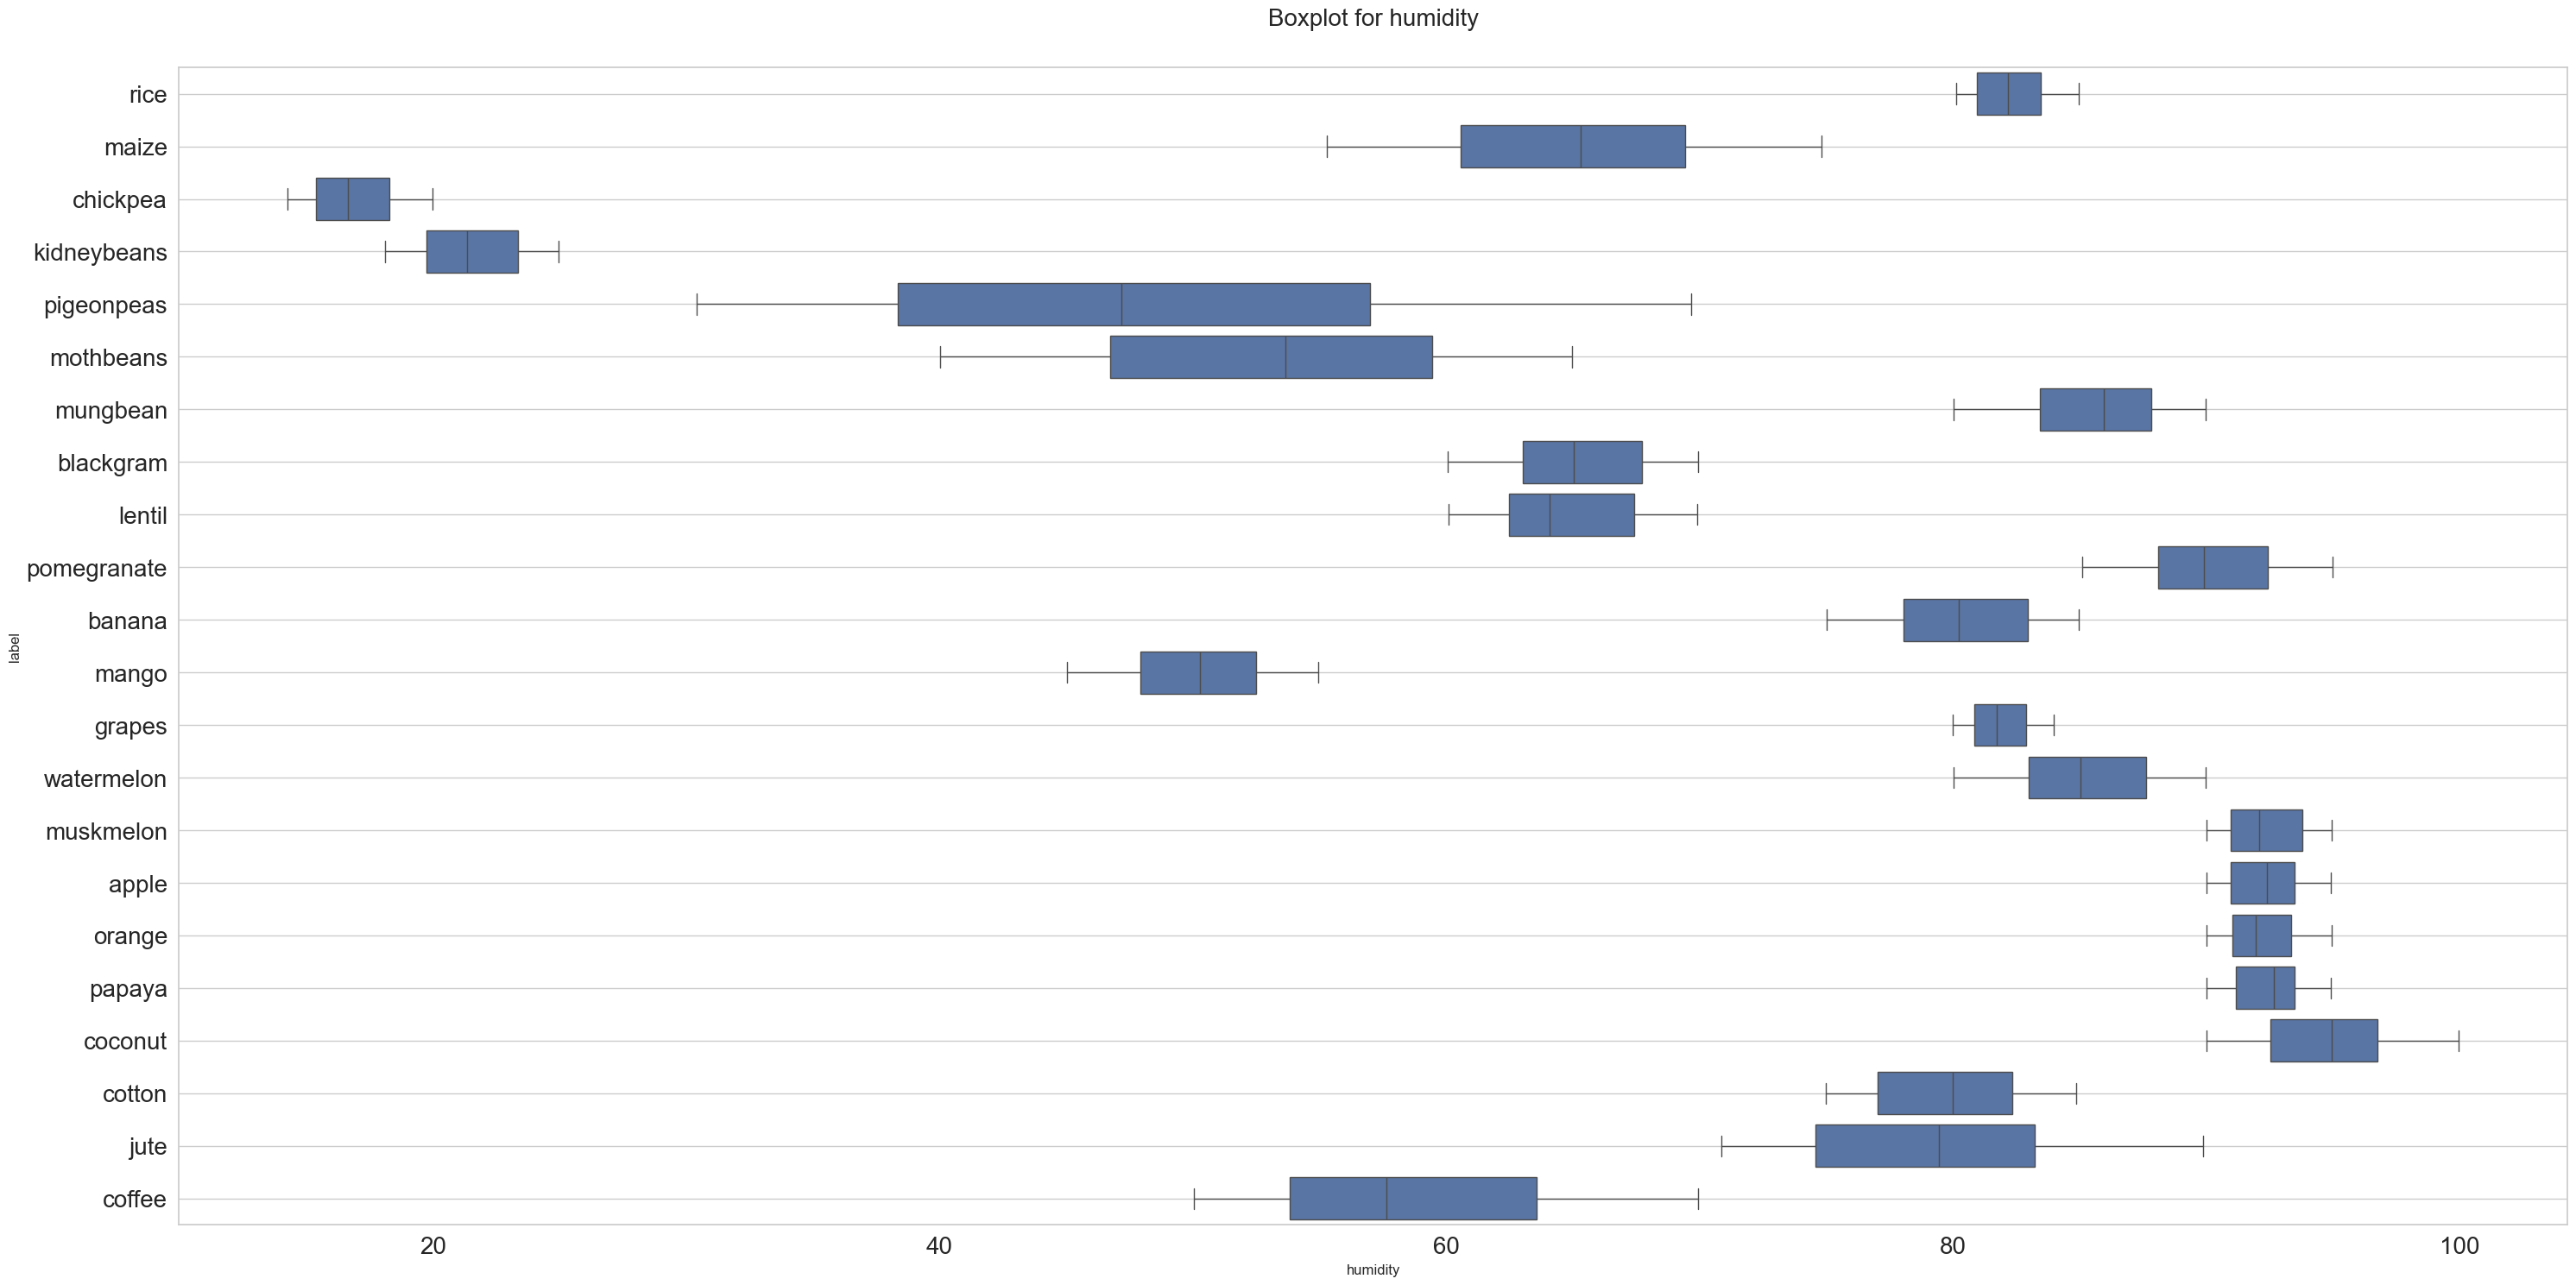

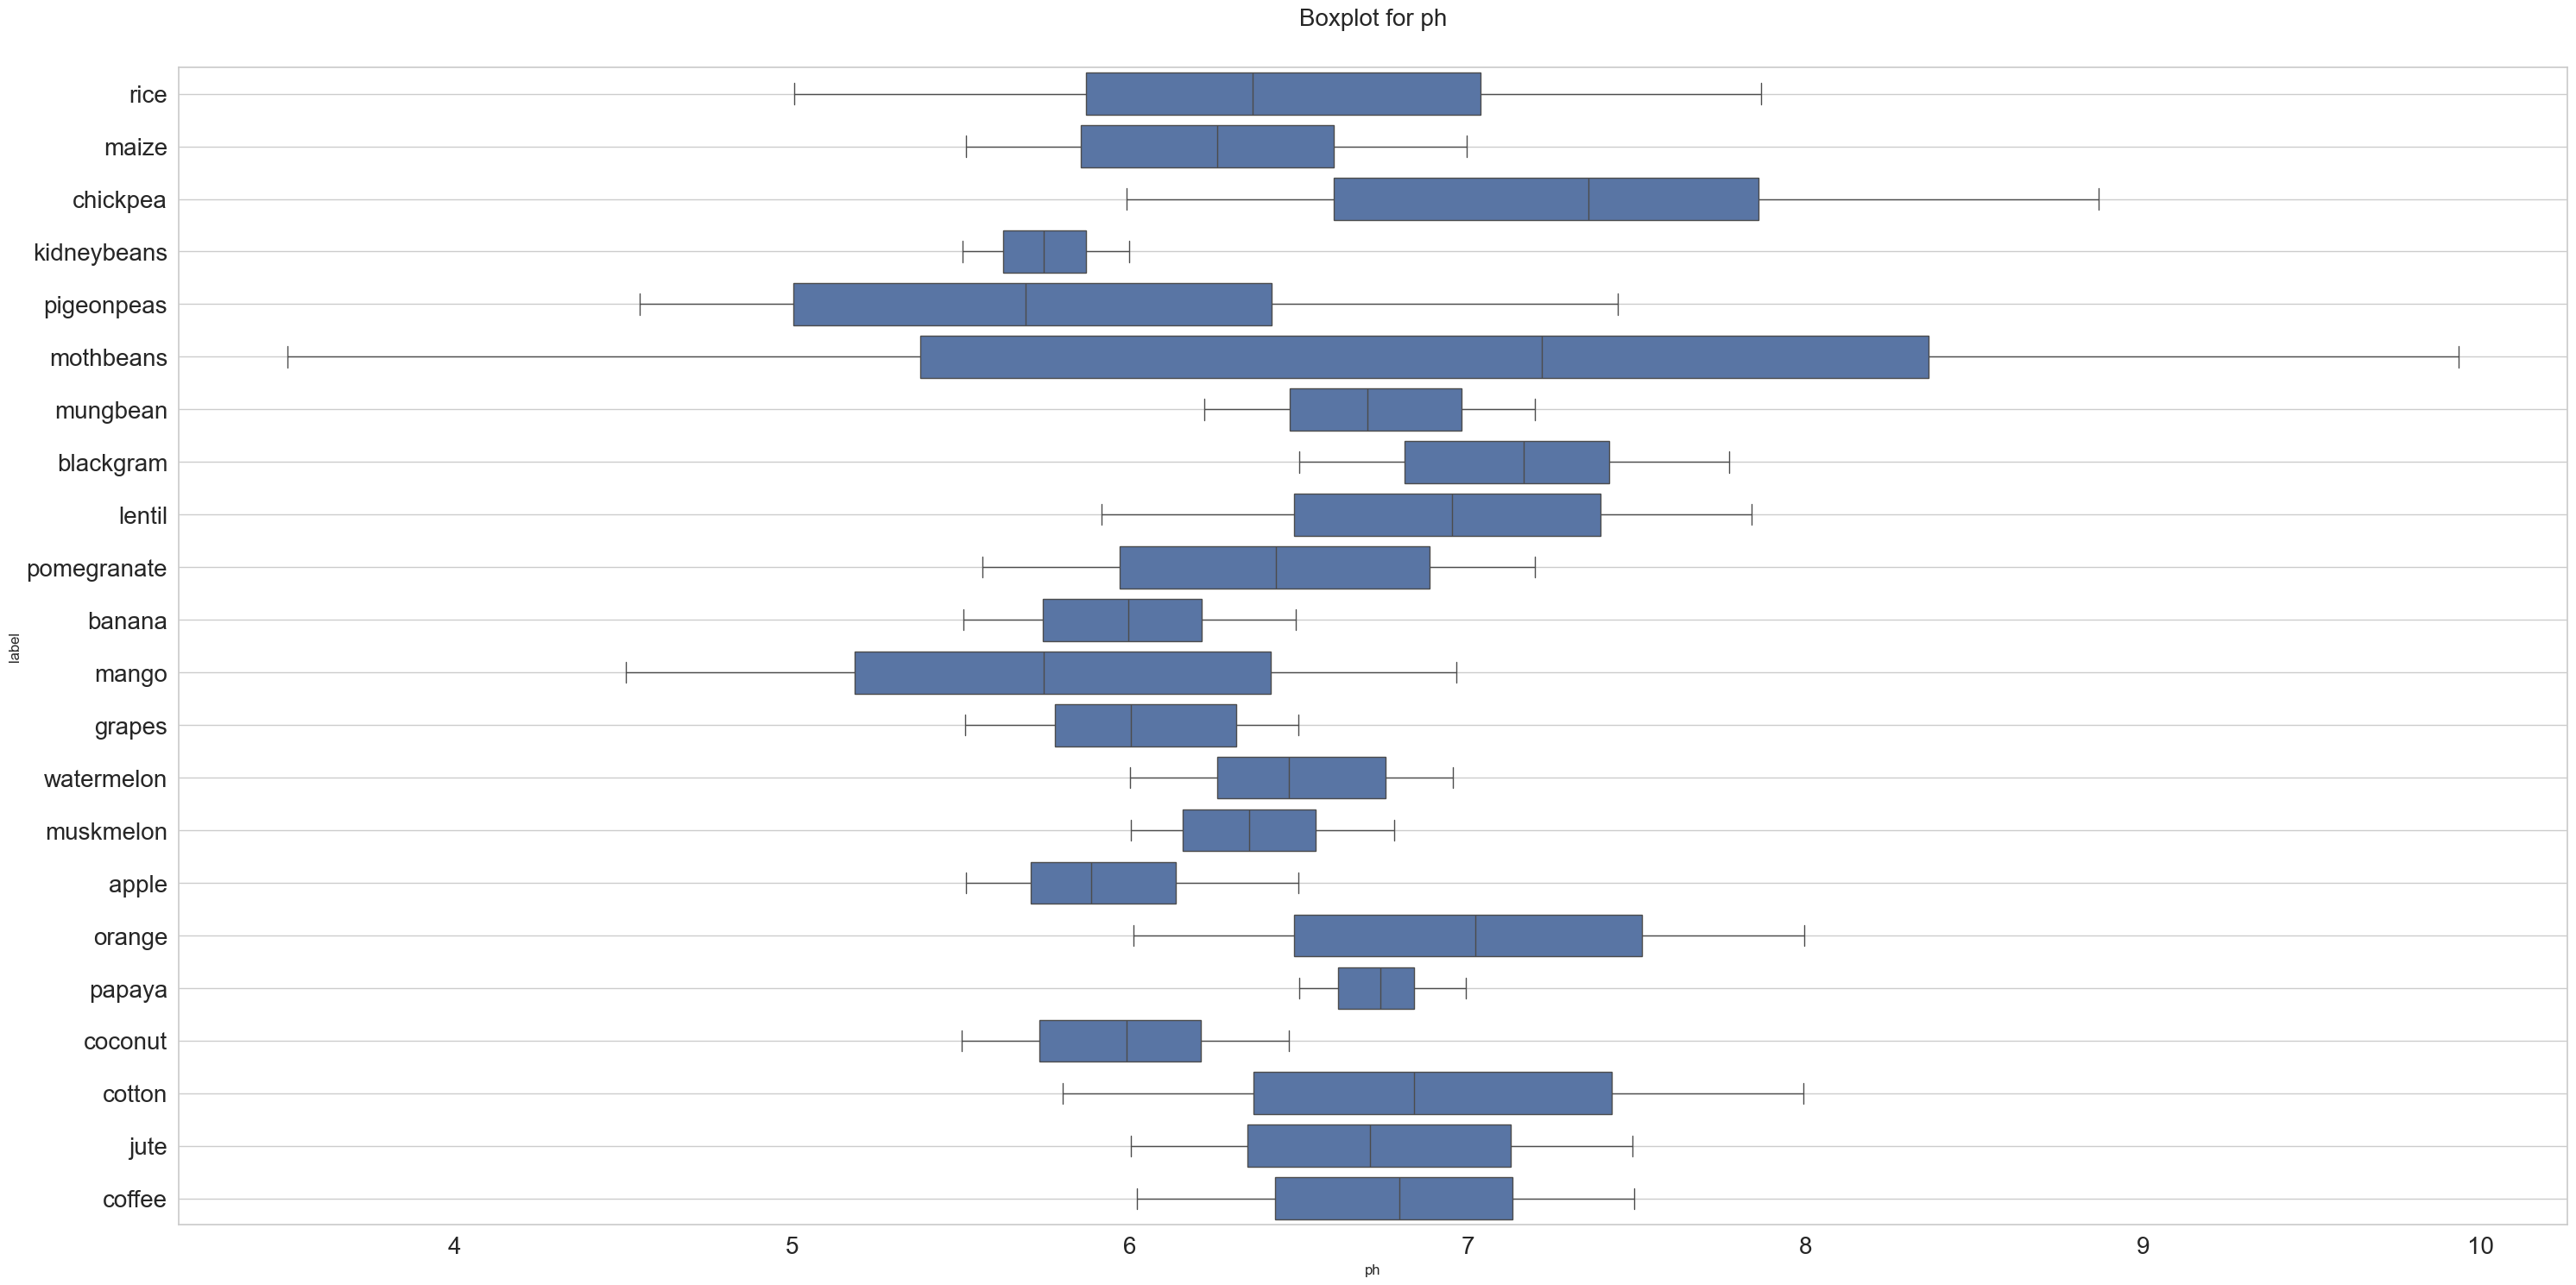

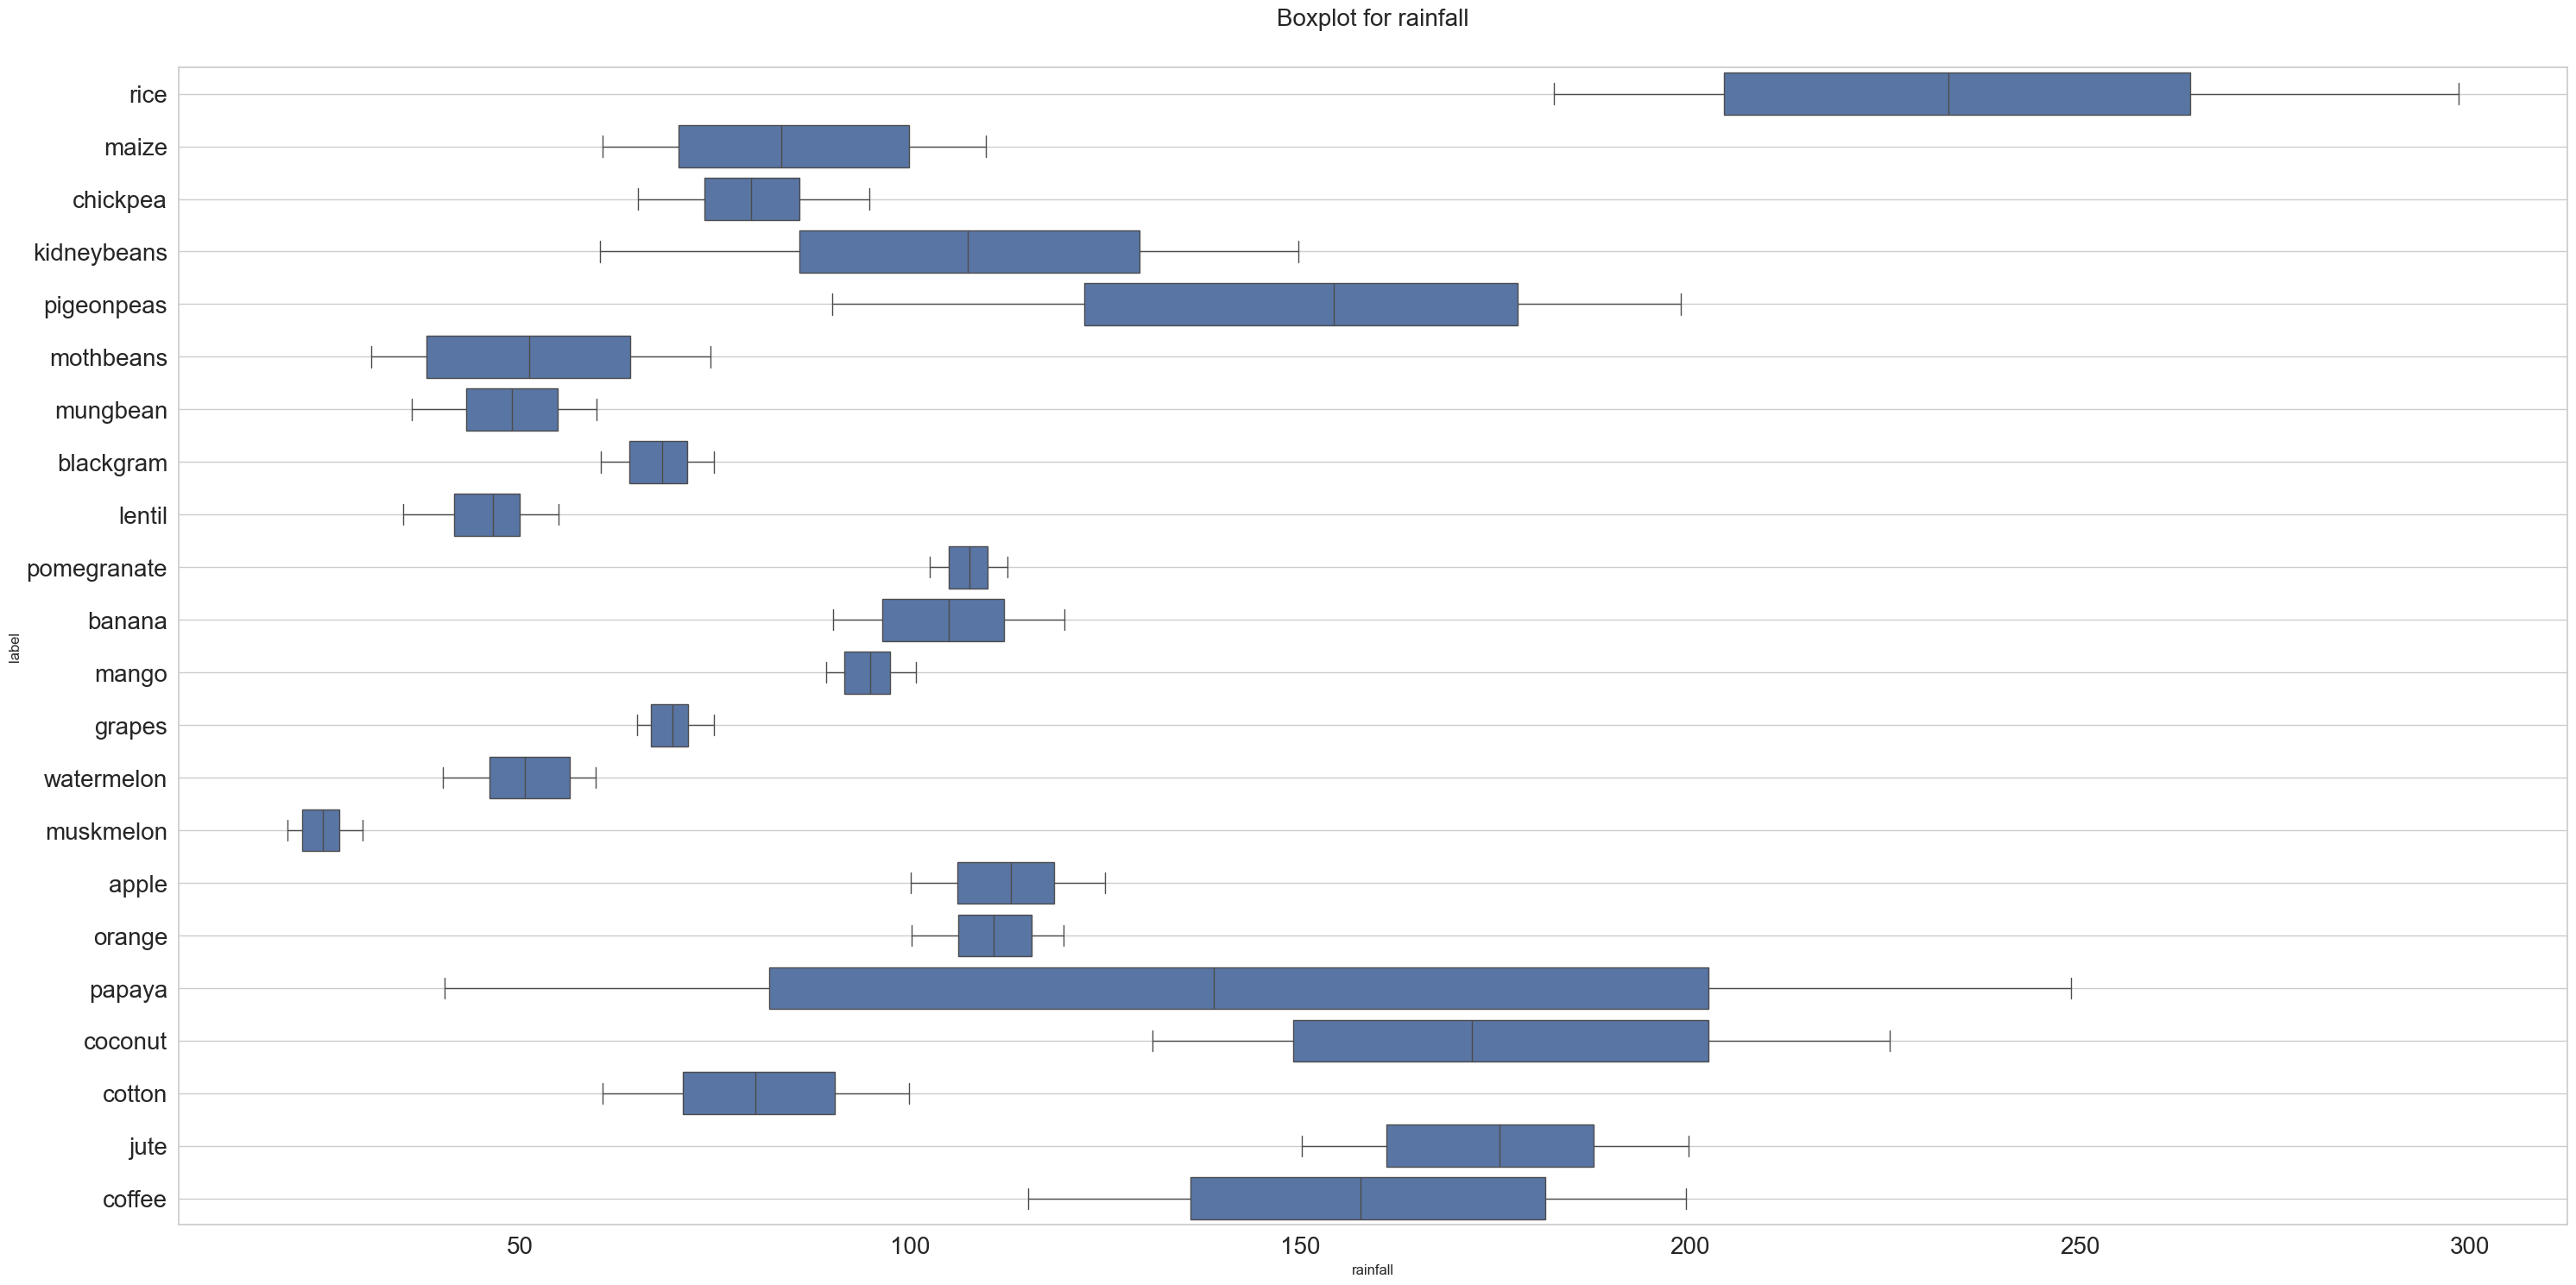

In [498]:
# To check for outliers we are using boxplot

for i, col in enumerate(df.columns[:-1]):
    plt.figure(figsize=(30,15))
    sns.boxplot(data = df, x = df[col], y = df["label"])
    plt.title(f"Boxplot for {col}", fontsize=20,y = 1.03)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"boxplot_{col}.png", dpi=300,bbox_inches = "tight")
    plt.show()

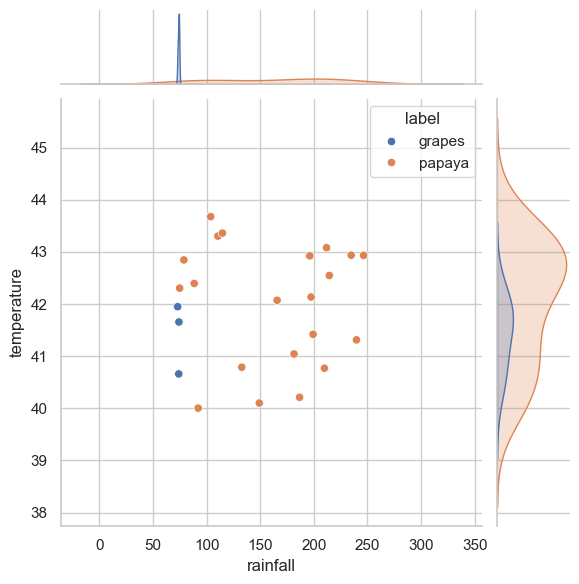

In [499]:
# JointPlot
# It combines three plots in one figure:
# Center: Scatter plot (default) or other bivariate plot
# Top margin: Distribution of x variable (histogram/KDE)
# Right margin: Distribution of y variable (histogram/KDE)

sns.jointplot(data= df.loc[(df["temperature"]>40) & (df["rainfall"]>70)], x = "rainfall", y = "temperature", hue = "label")
plt.savefig("jointplot.png",dpi = 300,bbox_inches = "tight")
# First filtering rows and jointplot is made accoding to classes(hue)

In [500]:
# Checking Co-relation between features using heatmap
corr = df.corr(numeric_only=True) # it ignores non-numeric columns like 'label'


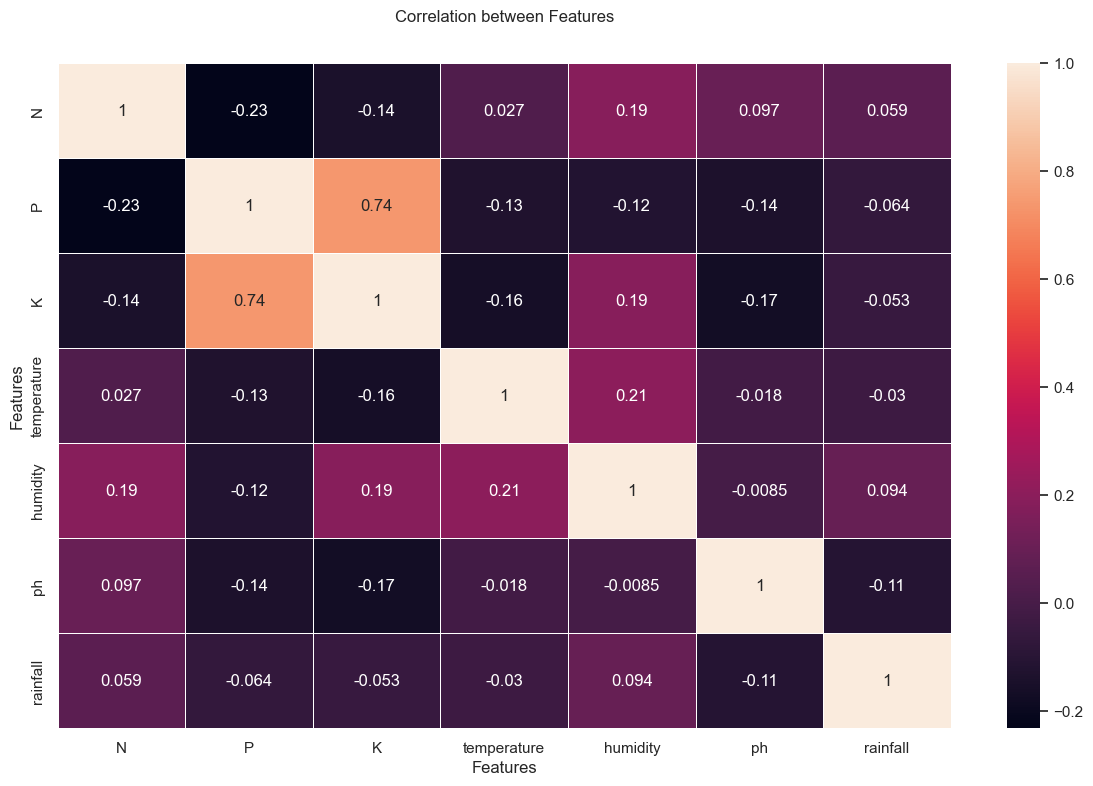

In [501]:
plt.figure(figsize=(12,8))
sns.heatmap(data = corr, annot = True, linewidths=0.5)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation between Features",y=1.05)
plt.tight_layout()
plt.savefig("Correlation_Features.png",dpi = 300,bbox_inches = "tight")
plt.show()

In [502]:
# Using Bar-plot to analyse the use of N-P-K by different crops
avg = df.groupby("label")[["N", "P", "K"]].mean().reset_index() #grouping and calculating mean
print(avg)

          label       N       P       K
0         apple   20.80  134.22  199.89
1        banana  100.23   82.01   50.05
2     blackgram   40.02   67.47   19.24
3      chickpea   40.09   67.79   79.92
4       coconut   21.98   16.93   30.59
5        coffee  101.20   28.74   29.94
6        cotton  117.77   46.24   19.56
7        grapes   23.18  132.53  200.11
8          jute   78.40   46.86   39.99
9   kidneybeans   20.75   67.54   20.05
10       lentil   18.77   68.36   19.41
11        maize   77.76   48.44   19.79
12        mango   20.07   27.18   29.92
13    mothbeans   21.44   48.01   20.23
14     mungbean   20.99   47.28   19.87
15    muskmelon  100.32   17.72   50.08
16       orange   19.58   16.55   10.01
17       papaya   49.88   59.05   50.04
18   pigeonpeas   20.73   67.73   20.29
19  pomegranate   18.87   18.75   40.21
20         rice   79.89   47.58   39.87
21   watermelon   99.42   17.00   50.22


In [503]:
#Melting the dataframe
melted_df = pd.melt(avg,id_vars=["label"], value_vars=["N","P","K"], var_name = "Nutrients", value_name = "Mean")
print(melted_df) # 22*3 = 66 rows

          label Nutrients    Mean
0         apple         N   20.80
1        banana         N  100.23
2     blackgram         N   40.02
3      chickpea         N   40.09
4       coconut         N   21.98
..          ...       ...     ...
61       papaya         K   50.04
62   pigeonpeas         K   20.29
63  pomegranate         K   40.21
64         rice         K   39.87
65   watermelon         K   50.22

[66 rows x 3 columns]


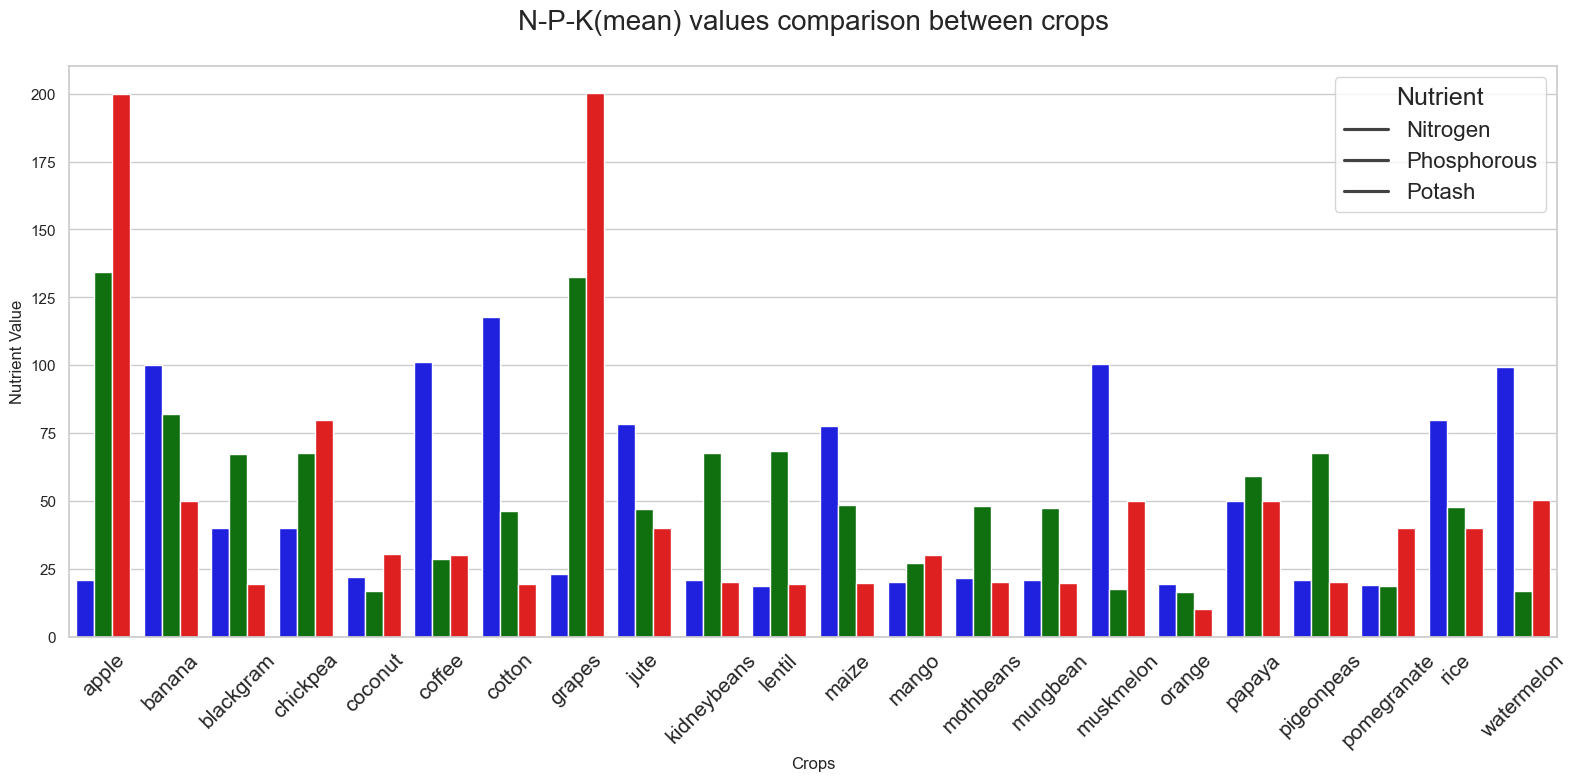

In [504]:
plt.figure(figsize=(16, 8))
sns.barplot(data=melted_df, x='label', y='Mean', hue='Nutrients',palette=["Blue","Green","Red"])
#  Plot style
sns.set(style="whitegrid")

plt.title('N-P-K(mean) values comparison between crops', fontsize=20,y= 1.05)
plt.xlabel('Crops')
plt.ylabel('Nutrient Value')
plt.xticks(rotation=45,fontsize = 15)
plt.legend(title='Nutrient', labels=['Nitrogen', 'Phosphorous', 'Potash'], fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.savefig("Mean_of_NPK_comparision.png",dpi = 300,bbox_inches = "tight")
plt.show()


ENCODING THE LABEL(RICE,MAIZE ...) IN OUR DATASET

In [505]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df.tail()
#Note:LabelEncoder assigns numbers based on sorted alphabetical order of all unique labels.
#To map back to (inverse transform)
#original_label = label.inverse_transform(df["label_encoded"])
# print(original_label)


N   P   K  temperature   humidity        ph    rainfall   label  \
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      label_encoded  
2195              5  
2196              5  
2197              5  
2198              5  
2199              5

In [506]:
df.drop(["label"],axis=1,inplace=True)
print(df)

        N   P   K  temperature   humidity        ph    rainfall  label_encoded
0      90  42  43    20.879744  82.002744  6.502985  202.935536             20
1      85  58  41    21.770462  80.319644  7.038096  226.655537             20
2      60  55  44    23.004459  82.320763  7.840207  263.964248             20
3      74  35  40    26.491096  80.158363  6.980401  242.864034             20
4      78  42  42    20.130175  81.604873  7.628473  262.717340             20
...   ...  ..  ..          ...        ...       ...         ...            ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507              5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610              5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839              5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293              5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041              5

[2200 rows x 8 columns]


In [507]:
print("{:<15} {:<15}".format("Label Encoded", "Labels (Crops)"))
print("-" * 35)
for i, crop_name in enumerate(le.classes_):
    print("{:<15} {:<15}".format(i, crop_name))

# "Why is there an underscore in le.classes_? Why not just le.classes?"
# Simple Answer:
# In scikit-learn, the underscore (_) at the end of a variable (like classes_) means:
# This attribute is created after fitting the model/encoder with .fit().


Label Encoded   Labels (Crops) 
-----------------------------------
0               apple          
1               banana         
2               blackgram      
3               chickpea       
4               coconut        
5               coffee         
6               cotton         
7               grapes         
8               jute           
9               kidneybeans    
10              lentil         
11              maize          
12              mango          
13              mothbeans      
14              mungbean       
15              muskmelon      
16              orange         
17              papaya         
18              pigeonpeas     
19              pomegranate    
20              rice           
21              watermelon     


In [508]:
# Now since I have dropped label column to know which label_encoded is which class or label or category
label_name = le.inverse_transform([20,5])
print(label_name) # So rice = 20 and coffee = 5

['rice' 'coffee']


In [509]:
df["label_encoded"].value_counts()

label_encoded
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64

TRAIN, TEST SPLIT

In [510]:
# train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
 # train = 80 % of dataset and test = remaining 20 % of dataset

In [511]:
X = df.drop(["label_encoded"],axis = 1)
y = df["label_encoded"]
# X.shape
# y.shape

In [512]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # 70% is for train and 30% for test 
# random_state=42 makes sure:
# The random shuffling stays the same
# You get repeatable results

# The number 42 is just a seed to control that randomness can be 100,30.
# Ensure the same data split every time you run it (as long as you keep the seed 42).
# print(X_train)

# What does train_test_split() return?
# It returns the same type of object as the inputs you give it.

In [513]:
X_train.shape

(1760, 7)

SCALING THE DATASET USING MINMAX SCALER AND STANDARD SCALER

In [514]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [515]:
def scale_dataset(X_arr,y_arr,scale = "minmax"):
    if scale == "minmax":
        minmax = MinMaxScaler()
        X_arr = minmax.fit_transform(X_arr)
    else: 
        standard = StandardScaler()
        X_arr = standard.fit_transform(X_arr)
    data = np.hstack((X, np.reshape(y, (-1,1)))) # as the y is oneD so first reshaping it to twoD and horizontally stacking to get complete
    return X_arr, y_arr, data
# Note : MinMaxScaler.fit_transform() returns a NumPy array, even if you give it a DataFrame.

In [516]:
X_train_scaled1, y_train_scaled1, train_scaled1 = scale_dataset(X_train, y_train, scale = "minmax")

In [517]:
print(train_scaled1)

[[ 90.          42.          43.         ...   6.50298529 202.9355362
   20.        ]
 [ 85.          58.          41.         ...   7.03809636 226.6555374
   20.        ]
 [ 60.          55.          44.         ...   7.84020714 263.9642476
   20.        ]
 ...
 [118.          33.          30.         ...   6.36260785 173.3228386
    5.        ]
 [117.          32.          34.         ...   6.75879255 127.1752928
    5.        ]
 [104.          18.          30.         ...   6.77983261 140.9370415
    5.        ]]


In [518]:
X_test_scaled1, y_test_scaled1, test_scaled1 = scale_dataset(X_test, y_test, scale = "minmax")

In [519]:
print(y_test_scaled1)

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
59      20
71      20
1908     6
1958     6
482     18
Name: label_encoded, Length: 440, dtype: int64


In [520]:
acc = []
model = []
acc_train = []

MODEL SELECTION

In [521]:
# KNN
# Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train_scaled1, y_train_scaled1)


KNeighborsClassifier()

In [522]:
#Prediction
y_pred = knn.predict(X_test_scaled1)

In [523]:
print(classification_report(y_test_scaled1, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

CONFUSION MATRIX

In [524]:
# Train accuracy
accuracy_train = knn.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of knn before tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of knn before tuning is : 0.990909090909091


In [525]:
accuracy = knn.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy of knn before tuning is : {accuracy}")
acc.append(accuracy)
model.append("KNN before")

The accuracy of knn before tuning is : 0.9727272727272728


In [526]:
cm = confusion_matrix(y_test_scaled1, y_pred)
cm_norm = confusion_matrix(y_test_scaled1, y_pred, normalize= "true") #Normalised
# print(cm)

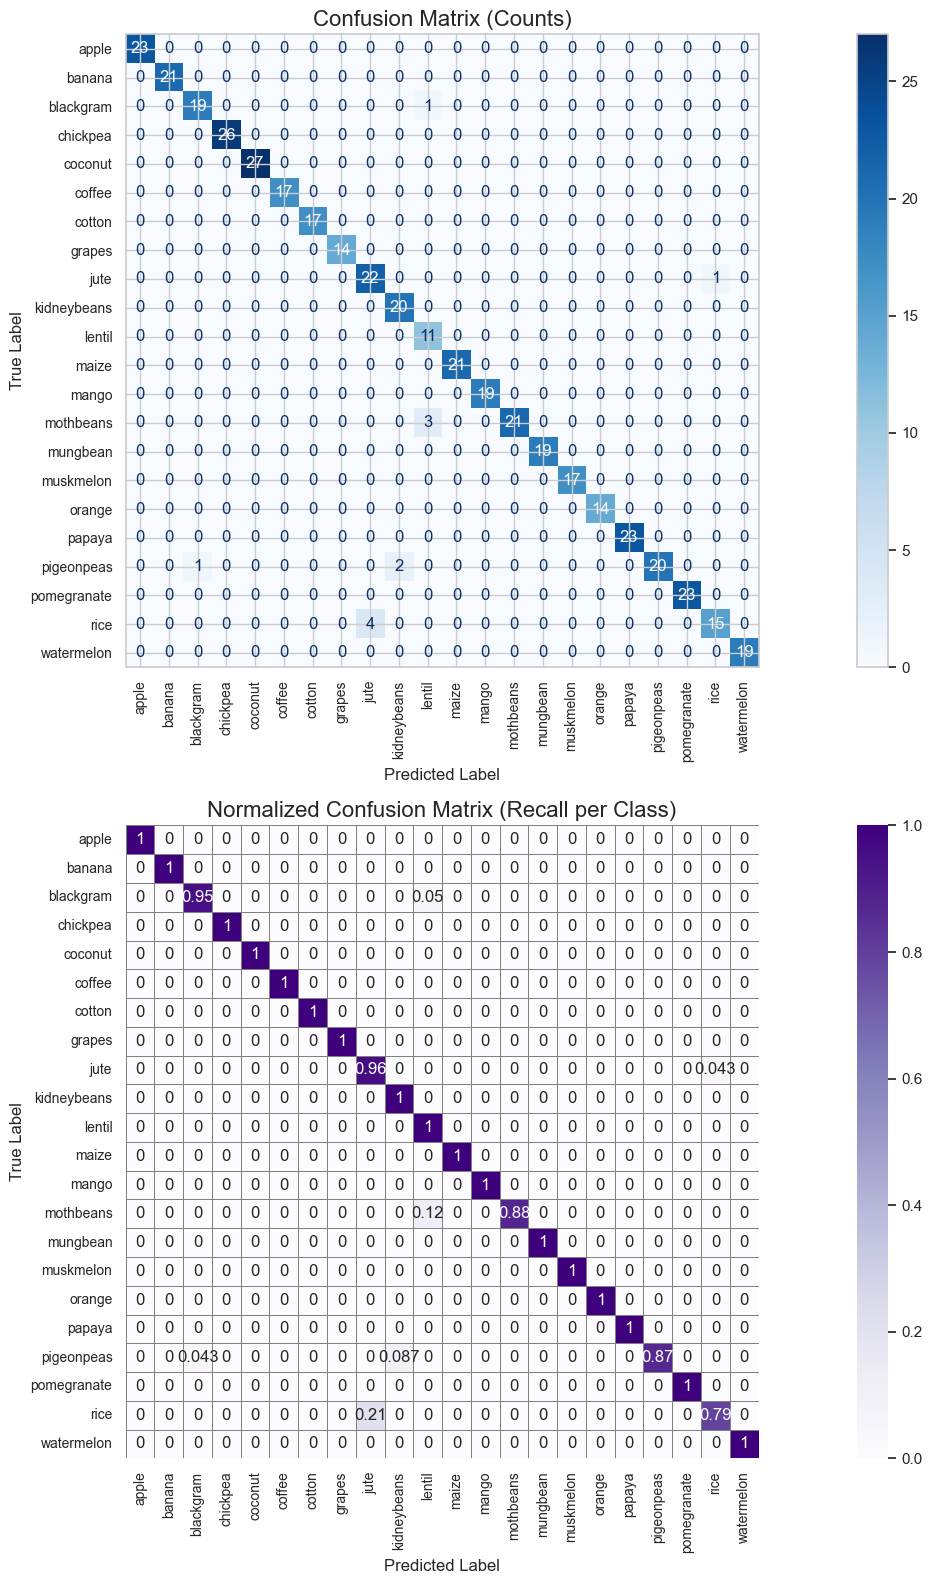

In [527]:
# Graphs
fig, ax = plt.subplots(2, 1, figsize=(20, 16))
# Raw counts
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(ax=ax[0], cmap="Blues", xticks_rotation=90)
ax[0].set_title("Confusion Matrix (Counts)", fontsize=16)
ax[0].set_xlabel("Predicted Label", fontsize=12)
ax[0].set_ylabel("True Label", fontsize=12)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)

# Using Heatmap for normalised
sns.heatmap(cm_norm, annot=True, 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap="Purples", ax=ax[1], cbar=True, linewidths=0.5, linecolor='gray', square=True)
ax[1].set_title("Normalized Confusion Matrix (Recall per Class)", fontsize=16)
ax[1].set_xlabel("Predicted Label", fontsize=12)
ax[1].set_ylabel("True Label", fontsize=12)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig("Confusion_matrix_knn1.png",dpi = 300,bbox_inches = "tight")
plt.show()

FINE TUNE

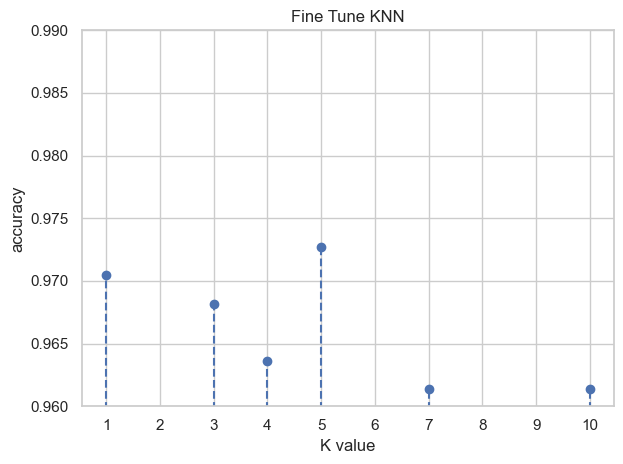

In [528]:
neighbour_range = range(1,11)
scores_accuracy = []

for k in neighbour_range:
    knn_obj = KNeighborsClassifier(n_neighbors = k)
    knn_obj.fit(X_train_scaled1, y_train_scaled1)
    scores_accuracy.append(knn_obj.score(X_test_scaled1, y_test_scaled1))

# The .score() method in scikit-learn does two things internally:
# It calls .predict(X_test) to get predicted values.
# Then it compares predictions with y_test to calculate the accuracy.

plt.xlabel('K value')
plt.ylabel('accuracy')
plt.scatter(neighbour_range, scores_accuracy)
plt.vlines(neighbour_range,0, scores_accuracy, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)])
plt.title("Fine Tune KNN")
plt.tight_layout()
plt.savefig("Fine_tune_knn.png",dpi = 300,bbox_inches = "tight")
plt.show()   

In [529]:
knn_obj2 = KNeighborsClassifier(n_neighbors=5)
knn_obj2.fit(X_train_scaled1, y_train_scaled1)

KNeighborsClassifier()

In [530]:
y_predknnafter = knn.predict(X_test_scaled1)

In [531]:
print(classification_report(y_test_scaled1, y_predknnafter,target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [532]:
# Train accuracy
accuracy_train = knn_obj2.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of knn after tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of knn after tuning is : 0.990909090909091


In [533]:
accuracy = knn_obj2.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy of KNN after tuning is : {accuracy}")
acc.append(accuracy)
model.append("KNN after")

The accuracy of KNN after tuning is : 0.9727272727272728


CONFUSION MATRIX FOR KNN AFTER TUNING

In [534]:
cm_Knnafter = confusion_matrix(y_test_scaled1,y_predknnafter)
# print(cm_Knnafter)

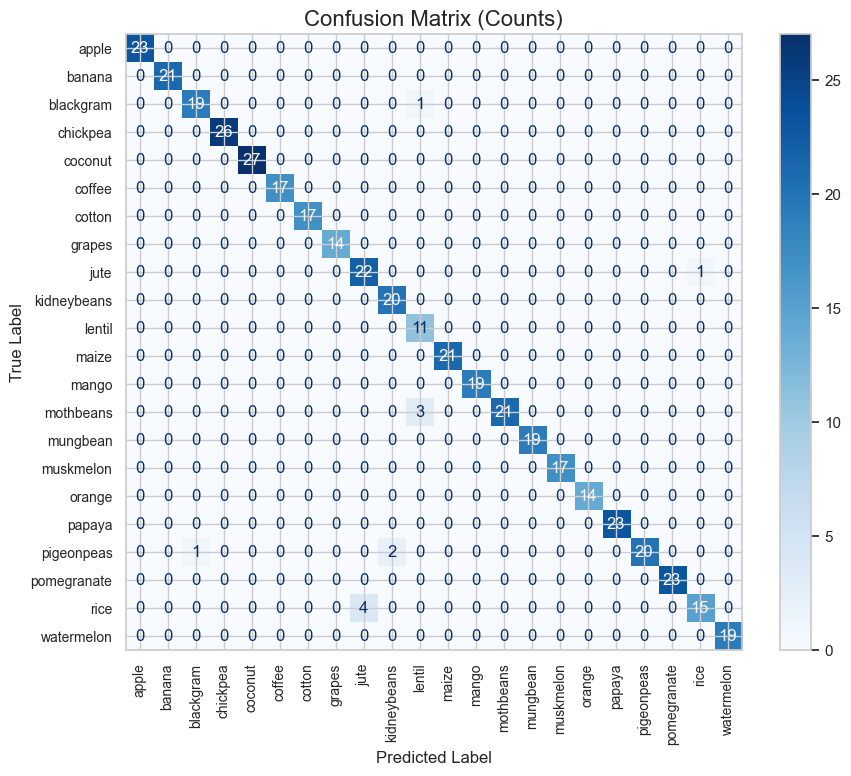

In [535]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (Counts)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.savefig("confusion_matrix_knn2.png", dpi=300, bbox_inches='tight')


HYPERPARAMETER TUNING FOR KNN

In [536]:
# Using GridSearchCV
from sklearn.model_selection import GridSearchCV
knn_hypertune = KNeighborsClassifier()
param_grid = {
    "n_neighbors" : [3,5,7,9,11,13],
    "weights" : ["uniform","distance"],
    "metric" : ["manhattan","euclidean","minkowski"]
    }
grid = GridSearchCV(knn_hypertune, param_grid, verbose=1,cv = 3,  n_jobs = -1,scoring='accuracy')

In [537]:
grid.fit(X_train_scaled1,y_train_scaled1)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [538]:
# Printing best combination of parameters
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [539]:
# Printing the best score
grid.best_score_

np.float64(0.9857967374261832)

In [540]:
# Returning the object(KNN) of best combination of parameters
knn_bestcomb = grid.best_estimator_

In [541]:
knn_bestcomb.fit(X_train_scaled1,y_train_scaled1) #Fitting with the best combination

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [542]:
y_predbestcom =  knn_bestcomb.predict(X_test_scaled1)

In [543]:
print(classification_report(y_test_scaled1,y_predbestcom,target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [544]:
#  Summary: Why grid.best_score_ is higher than final test accuracy

# During hyperparameter tuning using GridSearchCV, the grid.best_score_ (e.g., 98.4%)
# represents the **average cross-validation accuracy** calculated only on the training data
# (using 5-fold CV in our case). It does **not** involve the test set.

# After finding the best hyperparameters, we train the model again on the **entire training set**
# and evaluate it on the **unseen test set**. The resulting test accuracy (e.g., 97%)
# is usually slightly lower due to model generalization to new data.

#  This difference is expected and shows how the model performs on real, unseen data.
# The small gap also indicates the model is not overfitting and generalizes well.

#  Summary Table:
# ┌─────────────────────────────┬────────────────────────────────────────────┬──────────────────────┬─────────┐
# │          Metric             │               What it Measures             │      Data Used       │  Value  │
# ├─────────────────────────────┼────────────────────────────────────────────┼──────────────────────┼─────────┤
# │ grid.best_score_            │ Avg. accuracy during cross-validation      │ Training folds only  │  98.4%  │
# │ Accuracy on test set        │ Final performance on unseen data           │ Entire test set      │  97%    │
# └─────────────────────────────┴────────────────────────────────────────────┴──────────────────────┴─────────┘



In [545]:
accuracy = knn_bestcomb.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy after hypertuning of parameters is : {accuracy}")

The accuracy after hypertuning of parameters is : 0.9659090909090909


Using Support Vector Machine (SVM)

In [546]:
from sklearn.svm import SVC
kernel_list = ["linear", "rbf", "poly"]
for i in range(3):
    svm_obj = SVC(kernel = kernel_list[i]).fit(X_train_scaled1,y_train_scaled1)
    print(f"Accuracy using {kernel_list[i]} kernel is : {svm_obj.score(X_test_scaled1,y_test_scaled1)}")

Accuracy using linear kernel is : 0.9568181818181818
Accuracy using rbf kernel is : 0.9681818181818181
Accuracy using poly kernel is : 0.9613636363636363


In [547]:
# Train accuracy
svmtrain = SVC(kernel="rbf")
svmtrain.fit(X_train_scaled1, y_train_scaled1)
accuracy_train = svmtrain.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of svm before tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of svm before tuning is : 0.9852272727272727


In [548]:
accuracy = 0.9727272727272728
acc.append(accuracy)
model.append("SVM before")
# Above we can see that rbf kernel has the highest accuracy

HYPERPARAMETER TUNING FOR SVM

In [549]:
param_grid = {
    "C" : np.logspace(-3, 2, 6).tolist(),
    "gamma" : np.logspace(-3, 2, 6).tolist(),
    'degree': np.arange(0,5,1).tolist(),
}

In [550]:

for kernel in kernel_list:
    print(f"Kernel: {kernel}")

    if kernel == "poly":
        param_grid = {
            'C': np.logspace(-3, 2, 6).tolist(),
            'gamma': np.logspace(-3, 2, 6).tolist(),
            'degree': np.arange(0, 5, 1).tolist()
        }
    else:
        param_grid = {
            'C': np.logspace(-3, 2, 6).tolist(),
            'gamma': np.logspace(-3, 2, 6).tolist()
        }

    svm_obj2 = SVC(kernel=kernel)
    grid_search = GridSearchCV(svm_obj2, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Fit
    grid_search.fit(X_train_scaled1, y_train_scaled1)

    print(" Best Parameters:", grid_search.best_params_)
    print(" Best Accuracy:", grid_search.best_score_)

    

Kernel: linear
Fitting 3 folds for each of 36 candidates, totalling 108 fits
 Best Parameters: {'C': 10.0, 'gamma': 0.001}
 Best Accuracy: 0.9857986755120907
Kernel: rbf
Fitting 3 folds for each of 36 candidates, totalling 108 fits
 Best Parameters: {'C': 100.0, 'gamma': 10.0}
 Best Accuracy: 0.988637002323765
Kernel: poly
Fitting 3 folds for each of 180 candidates, totalling 540 fits
 Best Parameters: {'C': 0.001, 'degree': 2, 'gamma': 100.0}
 Best Accuracy: 0.9875032220678214


In [551]:
# So with the help of hyperparameter tuning we have rbf kernel with Parameters: {'C': 10.0, 'gamma': 1.0} giving the
# highest acuracy.

In [552]:
svm_obj3 = SVC(kernel="rbf", C=10, gamma=1.0)
svm_obj3.fit(X_train_scaled1,y_train_scaled1)
y_predsvm = svm_obj3.predict(X_test_scaled1)
report = classification_report(y_test_scaled1,y_predsvm, target_names=le.classes_)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [553]:
# Train accuracy
accuracy_train = svm_obj3.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of svm after tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of svm after tuning is : 0.990909090909091


In [554]:
accuracy = svm_obj3.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy after hypertuning of parameters is : {accuracy}")
acc.append(accuracy)
model.append("SVM after")

The accuracy after hypertuning of parameters is : 0.9727272727272728


CONFUSION MATRIX FOR SVM AFTER HYPERPARAMTER TUNING

In [555]:
cm_svmafter = confusion_matrix(y_test_scaled1, y_predsvm)
# print(cm_svmafter)

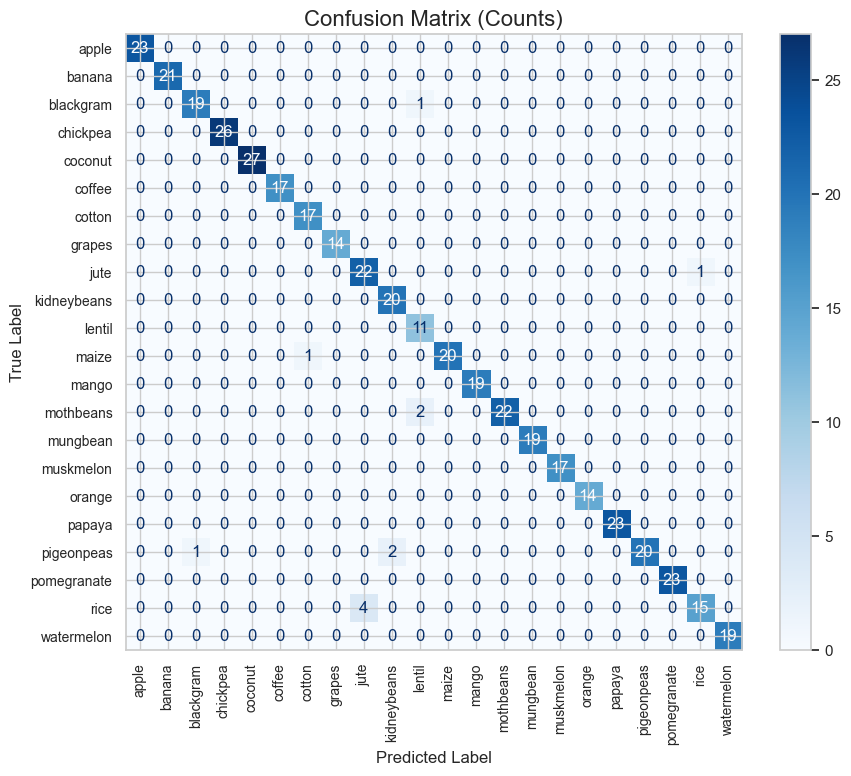

In [556]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm_svmafter, display_labels = le.classes_)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (Counts)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.savefig("confusion_matrix_svm.png", dpi=300, bbox_inches='tight')


GAUSSIAN NAIVE BAYES

In [557]:
from sklearn.naive_bayes import GaussianNB
naive_obj = GaussianNB()

naive_obj.fit(X_train_scaled1, y_train_scaled1) #Training



GaussianNB()

In [558]:
y_predNb = naive_obj.predict(X_test_scaled1) # Predicting

In [559]:
print(classification_report(y_test_scaled1, y_predNb, target_names= le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [560]:
# Train accuracy
accuracy_train = naive_obj.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of naive bayes is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of naive bayes is : 0.9948863636363636


In [561]:
accuracy = naive_obj.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy of Naive Bayes before hyperparameter tuning is : {accuracy}")
acc.append(accuracy)
model.append("Naive Bayes ")

The accuracy of Naive Bayes before hyperparameter tuning is : 0.9931818181818182


CONFUSION MATRIX FOR NAIVE BAYES

In [562]:
cm_naive = confusion_matrix(y_test_scaled1, y_predNb)
# print(cm_naive)

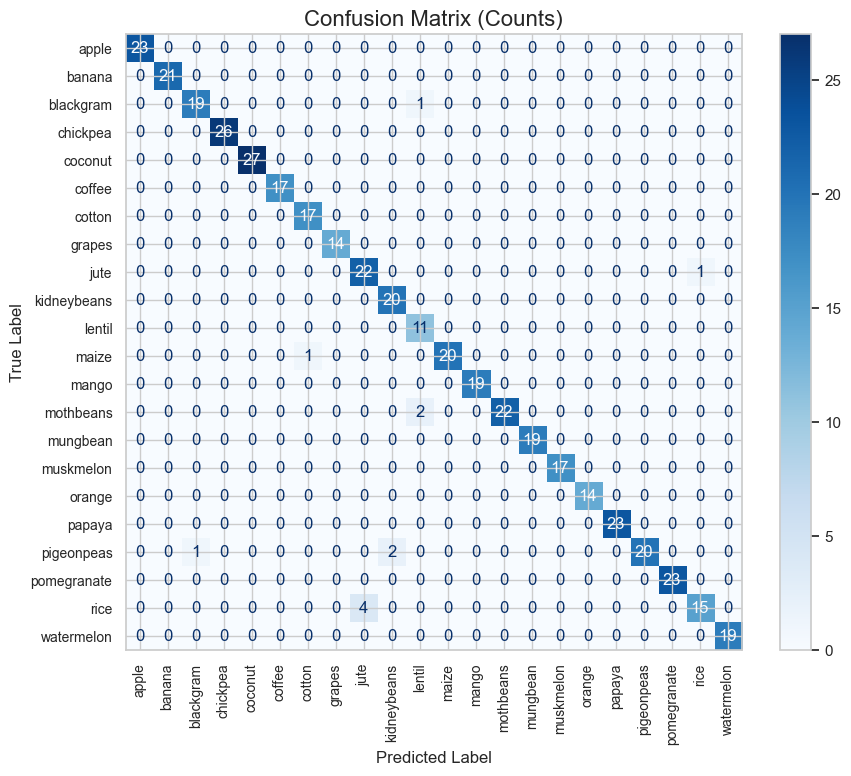

In [563]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm_svmafter, display_labels = le.classes_)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (Counts)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.savefig("confusion_matrix_naive.png", dpi=300, bbox_inches='tight')


DECISION FOREST 

In [564]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(X_train_scaled1, y_train_scaled1)



DecisionTreeClassifier()

In [565]:
y_predDT = DT.predict(X_test_scaled1)
print(classification_report(y_test_scaled1, y_predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.90      0.78      0.84        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      0.95      0.97        19
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
          17       1.00    

In [566]:
# Train accuracy
accuracy_train = DT.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of decisoin tree before tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of decisoin tree before tuning is : 1.0


In [567]:
accuracy = DT.score(X_test_scaled1, y_test_scaled1)
print(f"The accuracy before hyperparameter tuning is : {accuracy}")
acc.append(accuracy)
model.append("Decision Tree before")

The accuracy before hyperparameter tuning is : 0.9772727272727273


HYPERPARAMETER TUNING FOR DECISION TREE

In [568]:
DT_hypertune = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_DT = GridSearchCV(estimator = DT_hypertune, param_grid = param_grid, n_jobs = -1, verbose = 1, scoring = "accuracy", cv = 3)



In [569]:
grid_DT.fit(X_train_scaled1, y_train_scaled1)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [570]:
print(" Best Parameters:", grid_DT.best_params_)
print(" Best Accuracy:", grid_DT.best_score_)


 Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Best Accuracy: 0.9863607204252937


In [571]:
# Returning the object of decision tree with the best parameters
DT_best = grid_DT.best_estimator_

In [572]:
DT_best.fit(X_train_scaled1, y_train_scaled1) #Fitting 

DecisionTreeClassifier(max_depth=15)

In [573]:
y_predDTbest =  DT_best.predict(X_test_scaled1)
print(classification_report(y_test_scaled1, y_predDTbest, target_names = le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.90      0.83      0.86        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00      0.97        14
      papaya       1.00    

In [574]:
# Train accuracy
accuracy_train = DT_best.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of decisoin tree after tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of decisoin tree after tuning is : 1.0


In [575]:
accuracy = DT_best.score(X_test_scaled1, y_test_scaled1)
print(f"The accuracy before hyperparameter tuning is : {accuracy}")
acc.append(accuracy)
model.append("Decision Tree after")

The accuracy before hyperparameter tuning is : 0.9795454545454545


CONFUSION MATRIX FOR DECISION TREE AFTER TUNING

In [576]:
cm_naive = confusion_matrix(y_test_scaled1, y_predDTbest)
# print(cm_naive)

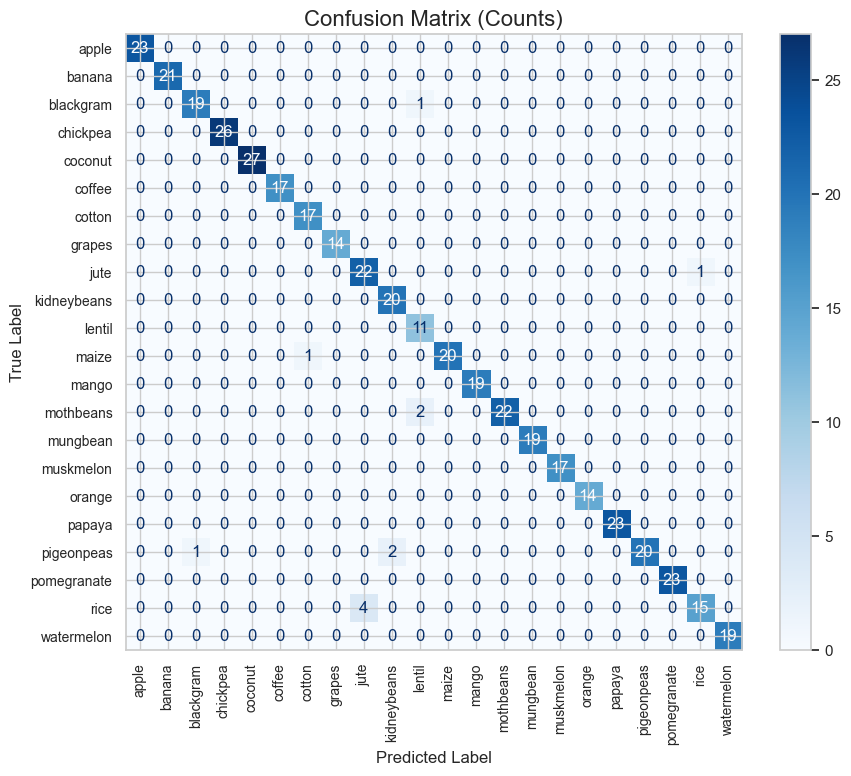

In [577]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm_svmafter, display_labels = le.classes_)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (Counts)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.savefig("confusion_matrix_decision.png", dpi=300, bbox_inches='tight')


RANDOMFOREST 

In [578]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train_scaled1, y_train_scaled1)

predicted_values = RF.predict(X_test_scaled1)
print(classification_report(y_test_scaled1,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.91      0.91        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [579]:
# Train accuracy
accuracy_train = RF.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of  Random Forest before tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of  Random Forest before tuning is : 1.0


In [580]:
accuracy = RF.score(X_test_scaled1,y_test_scaled1)
print(f"The accuracy of Random Forest before hyperparameter tuning is : {accuracy}")
acc.append(accuracy)
model.append("Random forest before")

The accuracy of Random Forest before hyperparameter tuning is : 0.9886363636363636


HYPER PARAMETER TUNING FOR RANDOM FOREST

In [581]:
RF_tune = RandomForestClassifier()
# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],          # number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],           # min samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]   # number of features to consider at each split
}

grid_RF = GridSearchCV(estimator = RF_tune, param_grid = param_grid, scoring = "accuracy", n_jobs = -1, verbose = 1, cv = 3)

In [582]:
# Fitting 
grid_RF.fit(X_train_scaled1, y_train_scaled1)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [583]:
print(" Best Parameters:", grid_RF.best_params_)
print(" Best Accuracy:", grid_RF.best_score_)

 Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
 Best Accuracy: 0.9960230477176131


In [584]:
# Returning the object of RandomForestClassifier with best parameter as per Hyper paramter tuning
RF_best = grid_RF.best_estimator_

In [585]:
RF_best.fit(X_train_scaled1, y_train_scaled1)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=50)

In [586]:
y_predRFbest = RF_best.predict(X_test_scaled1)

In [597]:
print(classification_report(y_test_scaled1, y_predRFbest, target_names = le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [588]:
# Train accuracy
accuracy_train = RF_best.score(X_train_scaled1, y_train_scaled1)
print(f"The  train accuracy of  Random Forest after tuning is : {accuracy_train}")
acc_train.append(accuracy_train)

The  train accuracy of  Random Forest after tuning is : 1.0


In [589]:
accuracy = accuracy_score(y_test_scaled1, y_predRFbest)
print(f"The accuracy of Random Forest : {accuracy}")
acc.append(accuracy)
model.append("Random Forest after")

The accuracy of Random Forest : 0.9931818181818182


CONFUSION MATRIX FOR RANDOM FOREST AFTER TUNING

In [590]:
cm_randomAfter = confusion_matrix(y_test_scaled1, y_predRFbest)
# print(cm_randomAfter)

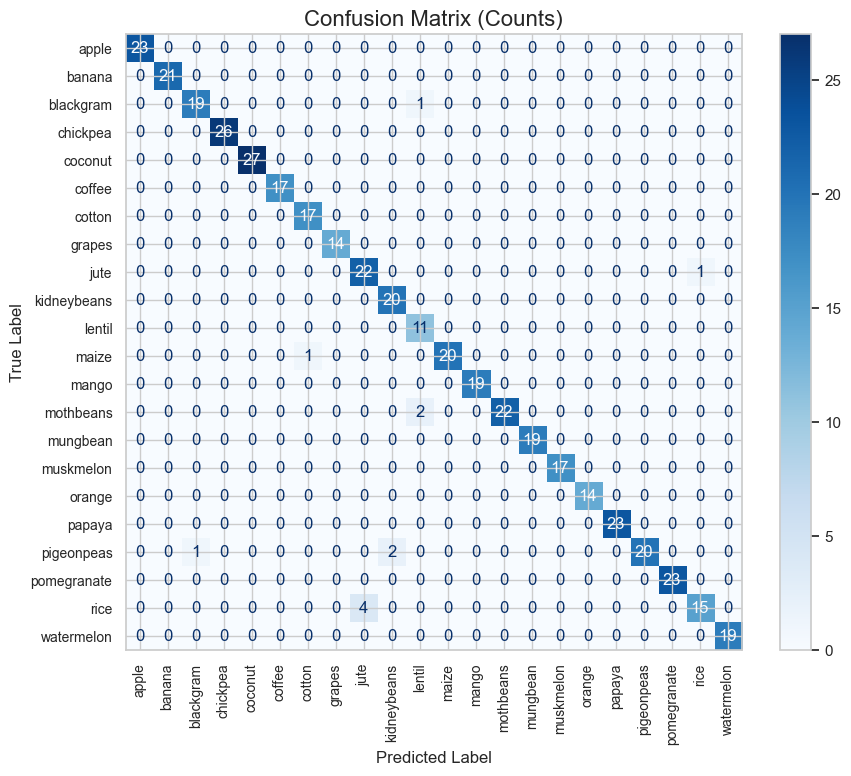

In [591]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm_svmafter, display_labels = le.classes_)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
ax.set_title("Confusion Matrix (Counts)", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.savefig("confusion_matrix_random.png", dpi=300, bbox_inches='tight')


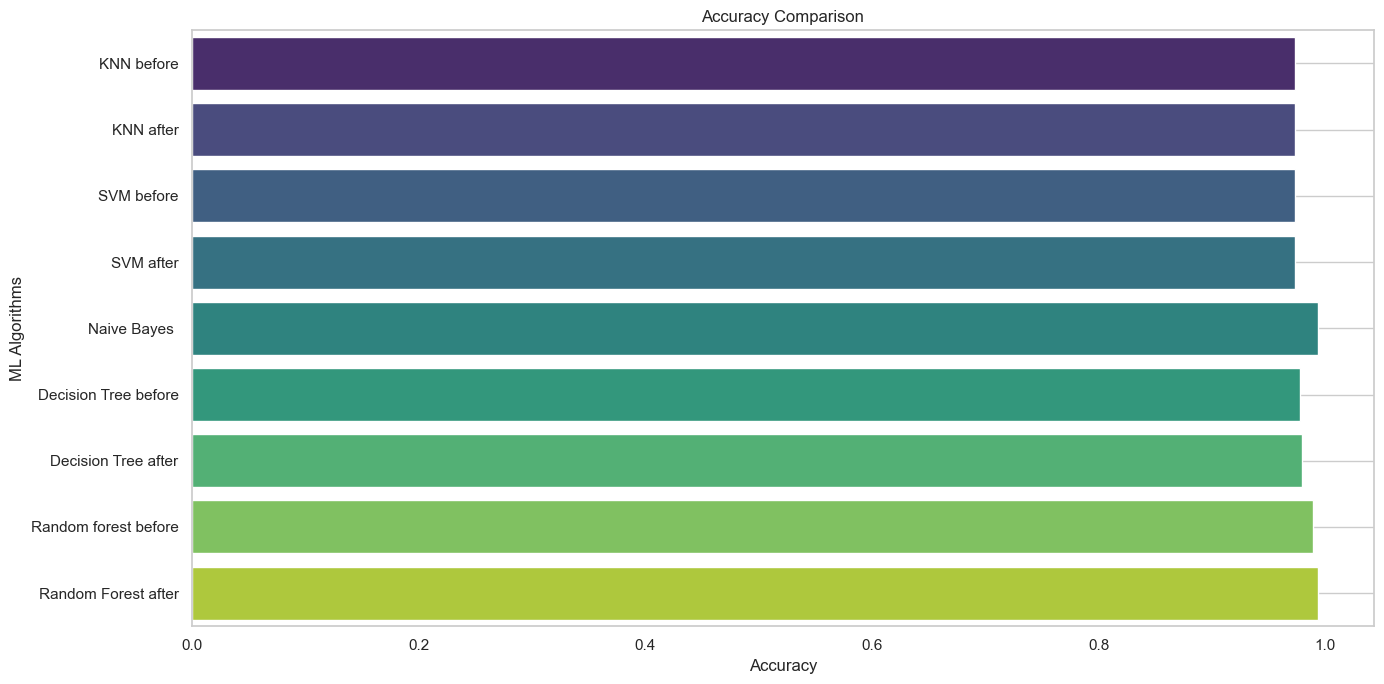

In [592]:
#accuracy comparison 
plt.figure(figsize=[14,7])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x=acc, y=model, hue=model, dodge=False, palette='viridis', legend=False)
plt.grid()
plt.savefig('Accuracy_comparision_of_model.png', dpi=300, bbox_inches='tight')
plt.tight_layout() 
plt.show()

In [593]:
for var1, var2 in zip(model, acc):
    print(f"{var1} : {var2}")

KNN before : 0.9727272727272728
KNN after : 0.9727272727272728
SVM before : 0.9727272727272728
SVM after : 0.9727272727272728
Naive Bayes  : 0.9931818181818182
Decision Tree before : 0.9772727272727273
Decision Tree after : 0.9795454545454545
Random forest before : 0.9886363636363636
Random Forest after : 0.9931818181818182


TRAINING TESTING COMPARISION

In [594]:
# Creating the DataFrame
df_accuracy = pd.DataFrame({
    'Model': model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc
})

# Displaying the DataFrame
print(df_accuracy)

                  Model  Train Accuracy  Test Accuracy
0            KNN before        0.990909       0.972727
1             KNN after        0.990909       0.972727
2            SVM before        0.985227       0.972727
3             SVM after        0.990909       0.972727
4          Naive Bayes         0.994886       0.993182
5  Decision Tree before        1.000000       0.977273
6   Decision Tree after        1.000000       0.979545
7  Random forest before        1.000000       0.988636
8   Random Forest after        1.000000       0.993182


MELTING THE DATAFRAME

In [595]:
df_melted = pd.melt(df_accuracy,
                    id_vars=['Model'],
                    value_vars=['Train Accuracy', 'Test Accuracy'],
                    var_name='Type',
                    value_name='Accuracy')

print(df_melted)


                   Model            Type  Accuracy
0             KNN before  Train Accuracy  0.990909
1              KNN after  Train Accuracy  0.990909
2             SVM before  Train Accuracy  0.985227
3              SVM after  Train Accuracy  0.990909
4           Naive Bayes   Train Accuracy  0.994886
5   Decision Tree before  Train Accuracy  1.000000
6    Decision Tree after  Train Accuracy  1.000000
7   Random forest before  Train Accuracy  1.000000
8    Random Forest after  Train Accuracy  1.000000
9             KNN before   Test Accuracy  0.972727
10             KNN after   Test Accuracy  0.972727
11            SVM before   Test Accuracy  0.972727
12             SVM after   Test Accuracy  0.972727
13          Naive Bayes    Test Accuracy  0.993182
14  Decision Tree before   Test Accuracy  0.977273
15   Decision Tree after   Test Accuracy  0.979545
16  Random forest before   Test Accuracy  0.988636
17   Random Forest after   Test Accuracy  0.993182


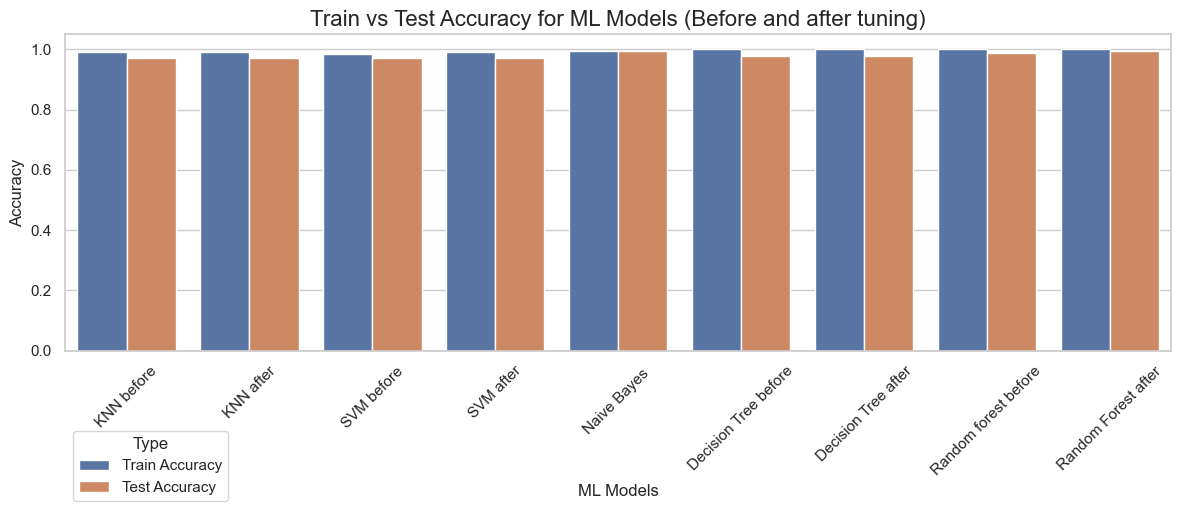

In [596]:
plt.figure(figsize=(12, 6))


sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Type')


plt.title('Train vs Test Accuracy for ML Models (Before and after tuning)', fontsize=16)
plt.xlabel('ML Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Type')
plt.legend(title='Type', loc='lower left', bbox_to_anchor=(0, -0.5))
plt.tight_layout()
plt.savefig("Train_Test.png", dpi=300, bbox_inches='tight')
plt.show()
